In [ ]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '7'
from torch.utils.data import DataLoader
import sys
sys.path.append('/home/mei/nas/docker/thesis/model_train')
from dataloader.ts_reader import MultiModalDataset,VitalSignsDataset,vital_pre_train
from model.autoencoder_v1 import RecurrentAutoencoder
from model_train.model.autoencoder_v1_loss_train import *
from plot_ae import *
import seaborn as sns
import matplotlib.pyplot as plt
import gc
gc.collect()

import torch
torch.cuda.empty_cache()

## overfit model

In [5]:

vital_signs_train = '/home/mei/nas/docker/thesis/data/hdf/train/ts_each_patient.h5'
vital_signs_val = '/home/mei/nas/docker/thesis/data/hdf/val/ts_each_patient.h5'
vital_signs_test = '/home/mei/nas/docker/thesis/data/hdf/test/ts_each_patient.h5'

train_dataset = VitalSignsDataset(vital_signs_train)
val_dataset = VitalSignsDataset(vital_signs_val)
test_dataset = VitalSignsDataset(vital_signs_test)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, collate_fn=vital_pre_train)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False, collate_fn=vital_pre_train) 
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False, collate_fn=vital_pre_train)

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

n_features = 154  
embedding_dim = 128
n_heads = 2
model = RecurrentAutoencoder(n_features, embedding_dim,n_heads).to(device)


In [7]:
save_path = '/home/mei/nas/docker/thesis/data/model_results/autoencoder/best_model_128——1e-3.pth'
history_path = '/home/mei/nas/docker/thesis/data/model_results/autoencoder/history_128——1e-3.json'
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
model, history = train_model_som(model, train_loader, val_loader, n_epochs=160,optimizer=optimizer, warmup_epochs=120,save_path=save_path,history_path=history_path,device=device)

Epoch 10: train loss 5.0596 val loss 5.1678 use_som=False
Epoch 20: train loss 4.0926 val loss 4.3080 use_som=False
Epoch 30: train loss 3.6830 val loss 3.8363 use_som=False
Epoch 40: train loss 3.4371 val loss 3.6946 use_som=False
Epoch 50: train loss 3.1042 val loss 3.4496 use_som=False
Epoch 60: train loss 3.0081 val loss 3.0567 use_som=False
Epoch 70: train loss 2.9060 val loss 3.0450 use_som=False
Epoch 80: train loss 2.6717 val loss 2.9070 use_som=False
Epoch 90: train loss 2.7078 val loss 2.7901 use_som=False
Epoch 100: train loss 2.5105 val loss 2.6434 use_som=False
Epoch 110: train loss 2.4883 val loss 2.5820 use_som=False
Epoch 120: train loss 2.5367 val loss 2.6626 use_som=True
Epoch 130: train loss 2.4021 val loss 2.6116 use_som=True
Epoch 140: train loss 2.3897 val loss 2.5645 use_som=True
Epoch 150: train loss 2.3438 val loss 2.4754 use_som=True
Epoch 160: train loss 2.3559 val loss 2.4573 use_som=True


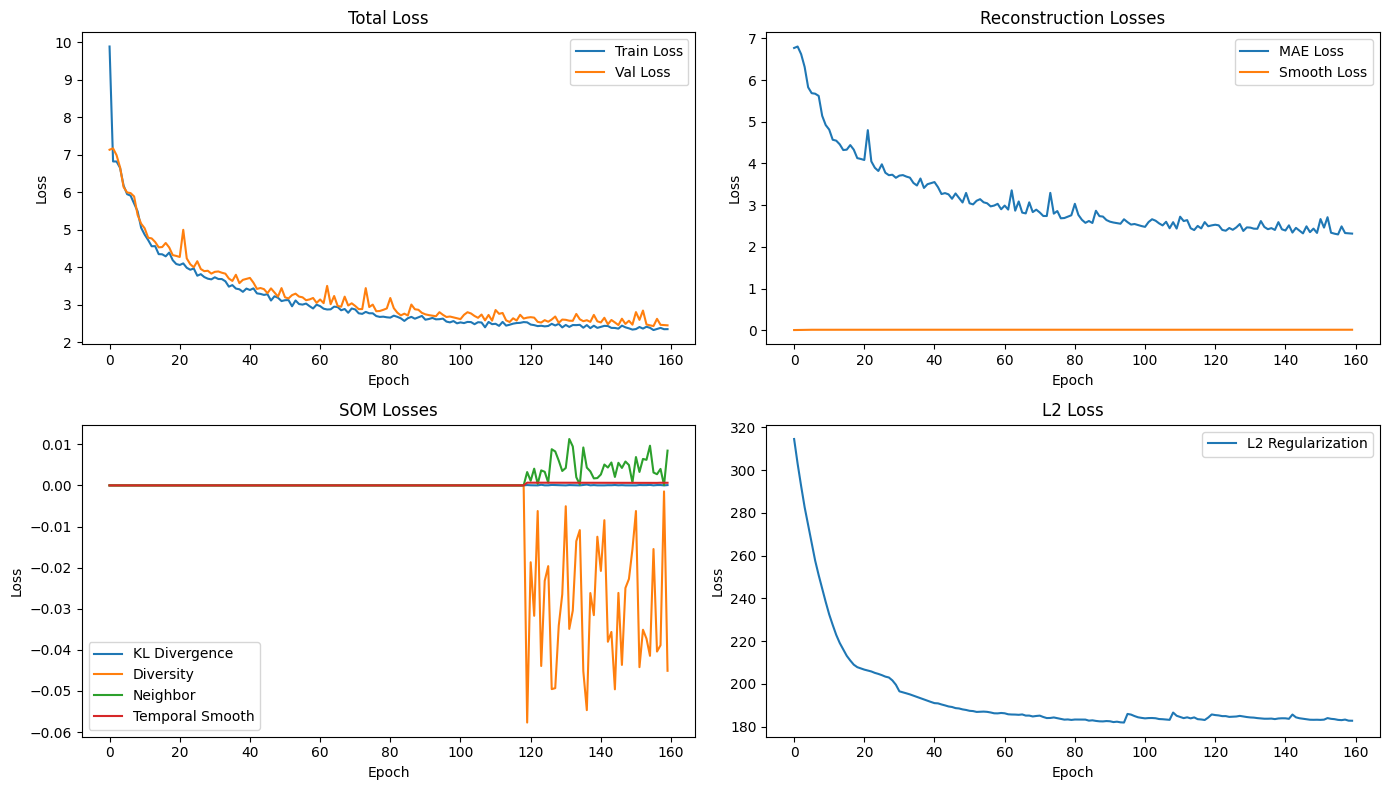

In [8]:
plot_training_history(history)

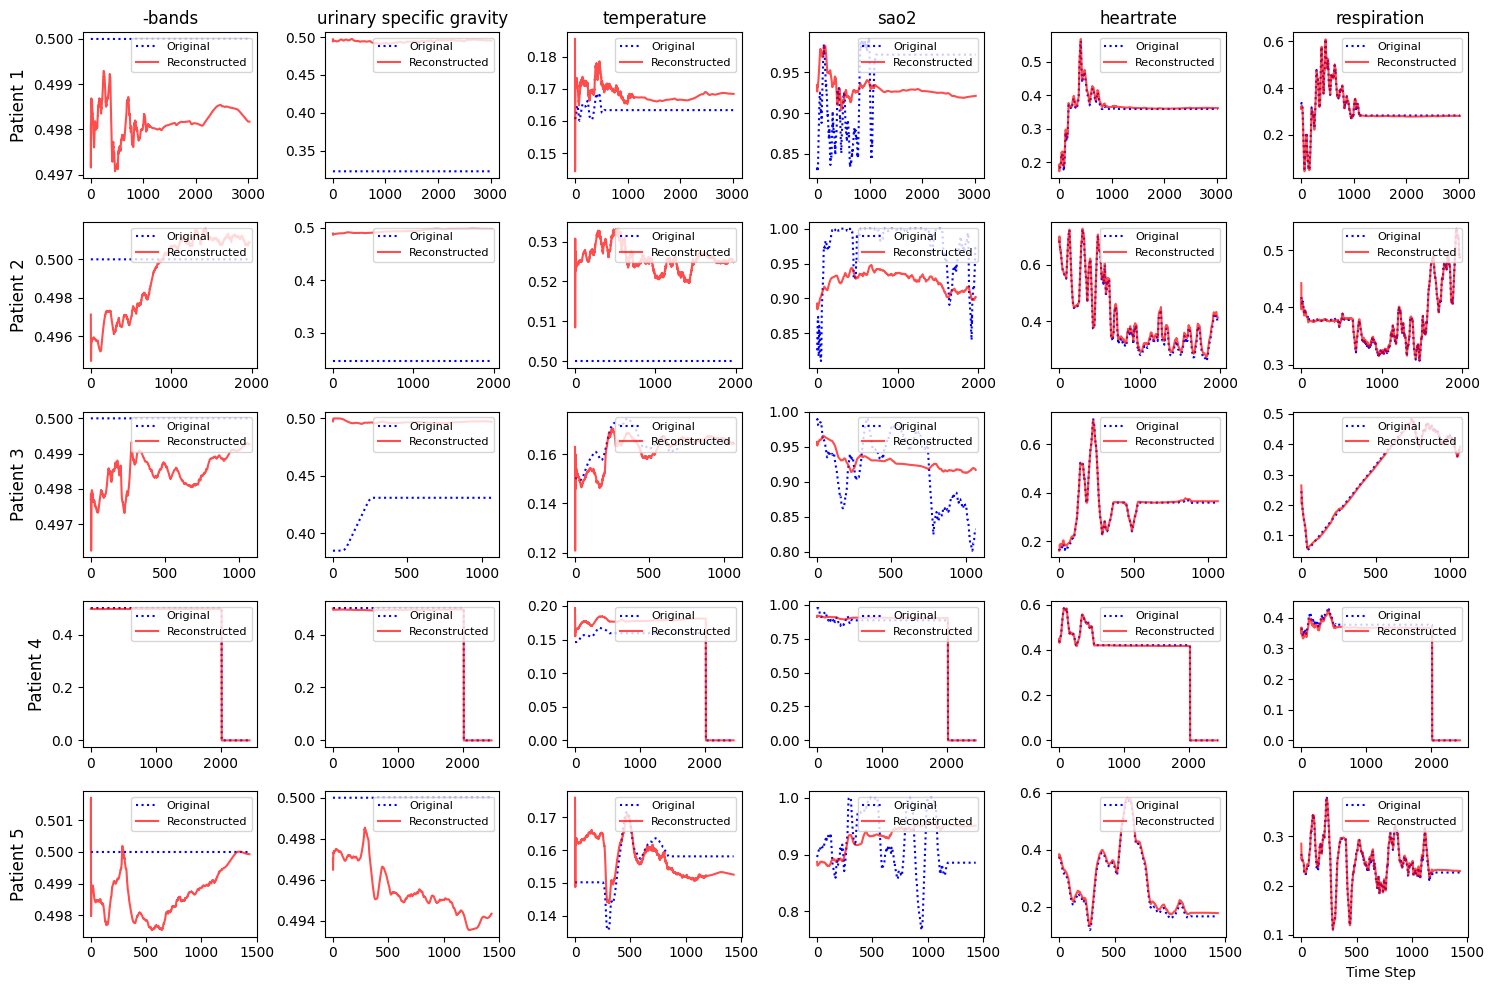

In [9]:
with open('/home/mei/nas/docker/thesis/data/hdf/features.txt', 'r') as f:
    features = [line.strip() for line in f]

selected_feature_indices = [0,142,143,144,145,146]  #

visualize_recons(model, test_loader, num_patients=5, feature_indices=selected_feature_indices, feature_names=features,device=device)

In [ ]:
save_path = '/home/mei/nas/docker/thesis/data/model_results/pre_train/best_model_128——1e-3.pth'
history_path = '/home/mei/nas/docker/thesis/data/model_results/pre_train/history_128——1e-3.json'
model, history = train_model_som(model, train_loader, val_loader, n_epochs=150, save_path=save_path,history_path=history_path,device=device)

Epoch 10: train loss 4.8849 val loss 5.0404 use_som=False
Epoch 20: train loss 4.2661 val loss 4.5313 use_som=False
Epoch 30: train loss 3.7784 val loss 3.7734 use_som=True
Epoch 40: train loss 3.3546 val loss 3.5794 use_som=True
Epoch 50: train loss 3.1458 val loss 3.2105 use_som=True
Epoch 60: train loss 2.8193 val loss 3.0161 use_som=True
Epoch 70: train loss 2.7797 val loss 2.9529 use_som=True
Epoch 80: train loss 2.5991 val loss 2.7952 use_som=True
Epoch 90: train loss 2.5410 val loss 2.7207 use_som=True
Epoch 100: train loss 2.5444 val loss 2.8325 use_som=True
Epoch 110: train loss 2.5364 val loss 2.6101 use_som=True
Epoch 120: train loss 2.3906 val loss 2.5550 use_som=True
Epoch 130: train loss 2.3420 val loss 2.6017 use_som=True
Epoch 140: train loss 2.3551 val loss 2.4643 use_som=True
Epoch 150: train loss 2.3633 val loss 2.5116 use_som=True


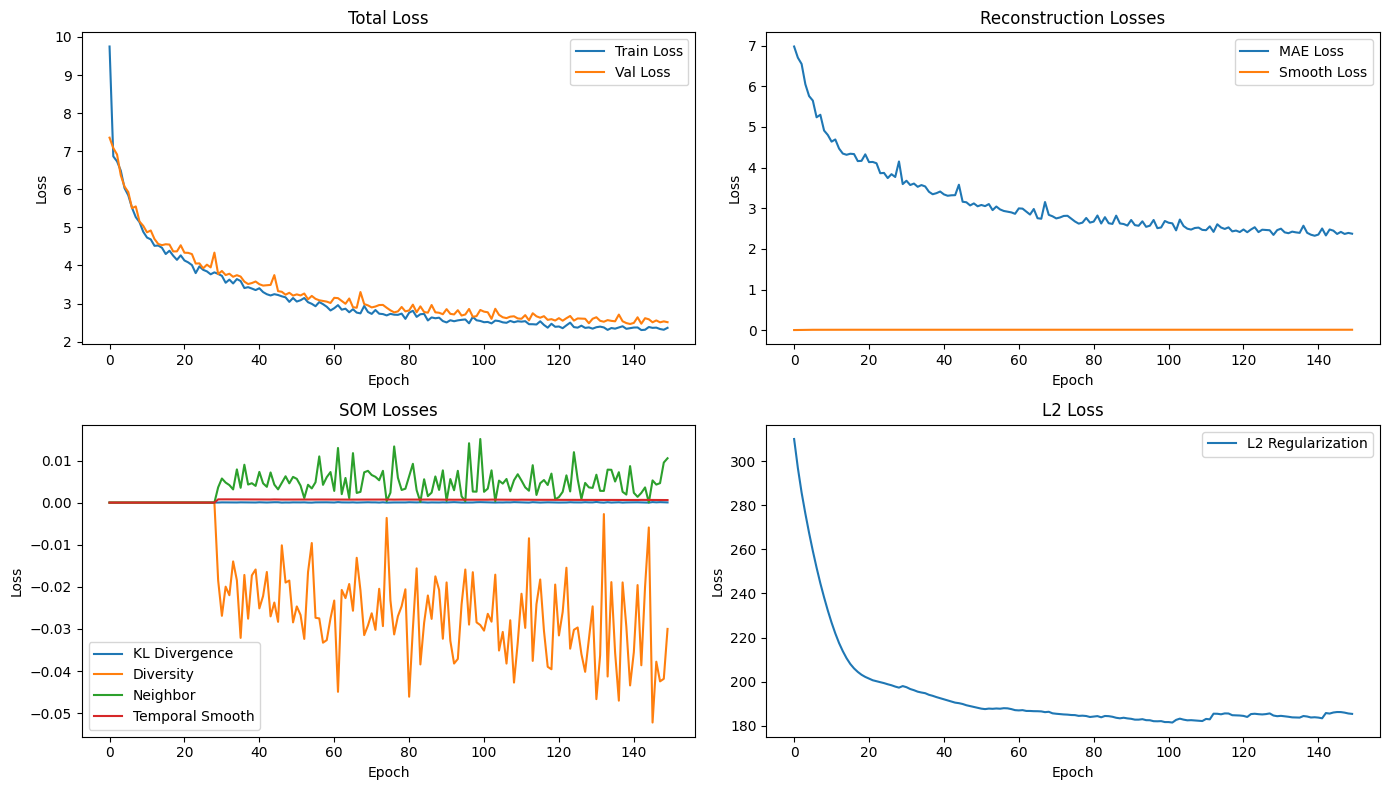

In [6]:
plot_training_history(history)

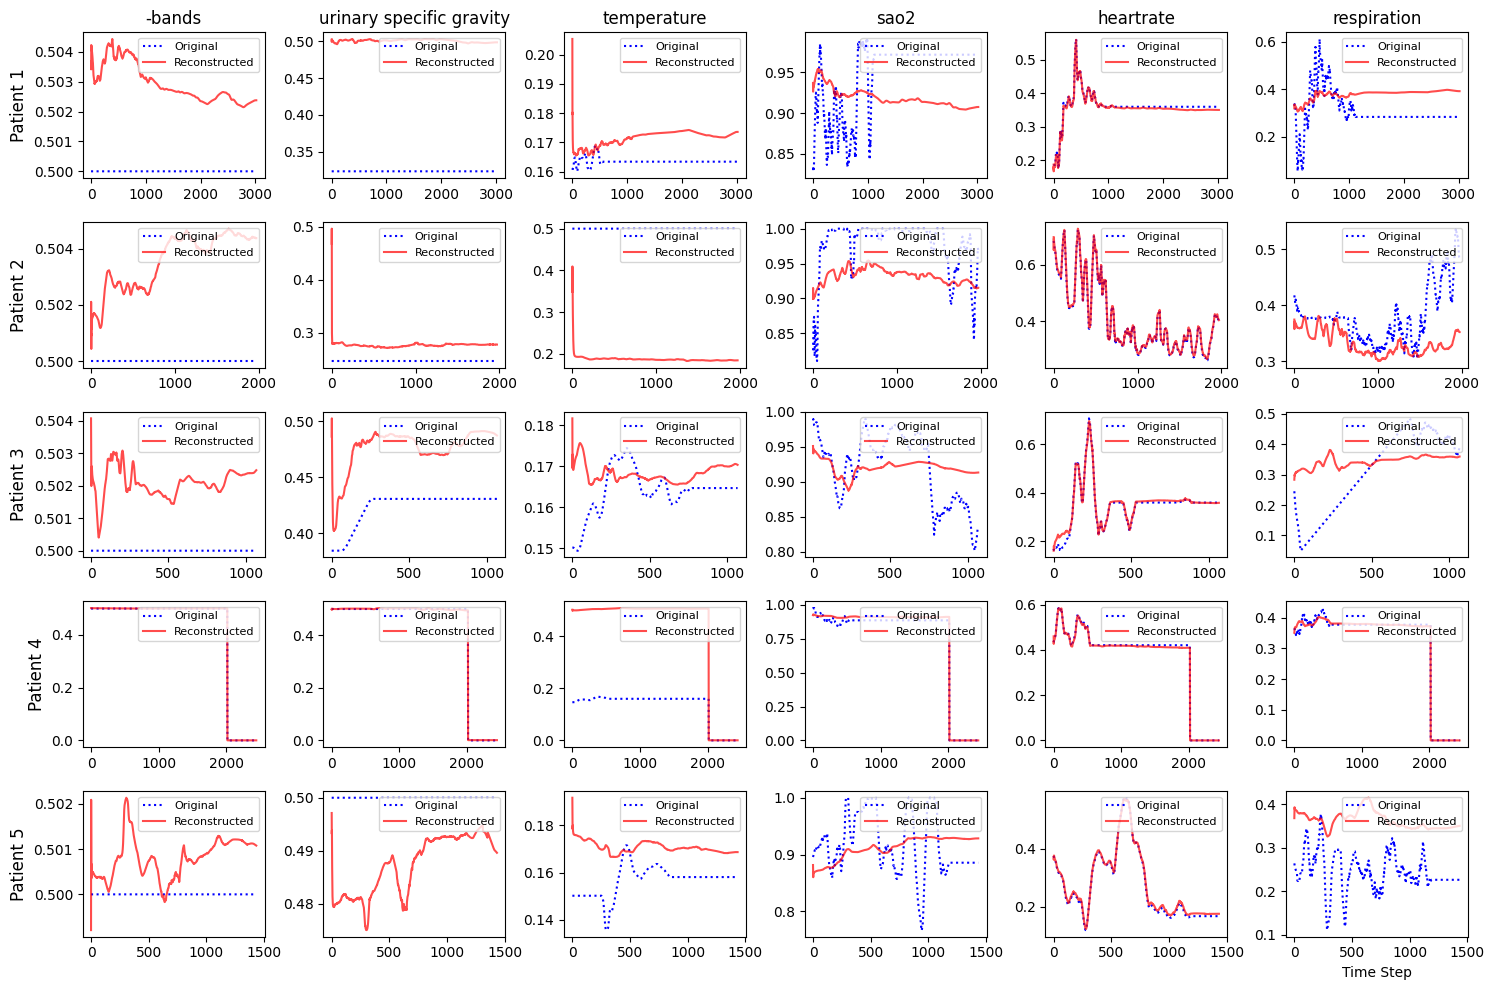

In [7]:
with open('/home/mei/nas/docker/thesis/data/hdf/features.txt', 'r') as f:
    features = [line.strip() for line in f]

selected_feature_indices = [0,142,143,144,145,146]  #

visualize_recons(model, test_loader, num_patients=5, feature_indices=selected_feature_indices, feature_names=features,device=device)

In [6]:
save_path = '/home/mei/nas/docker/thesis/data/model_results/pre_train/best_model_32——1e-3.pth'
history_path = '/home/mei/nas/docker/thesis/data/model_results/pre_train/history_32——1e-3.json'
model, history = train_model_som(model, train_loader, val_loader, n_epochs=150, save_path=save_path,history_path=history_path,device=device)

Epoch 10: train loss 6.3563 val loss 6.6319 use_som=False
Epoch 20: train loss 6.4854 val loss 6.5676 use_som=False
Epoch 30: train loss 6.3429 val loss 6.5378 use_som=True
Epoch 40: train loss 6.3469 val loss 6.5388 use_som=True
Epoch 50: train loss 6.3028 val loss 6.5333 use_som=True
Epoch 60: train loss 6.0405 val loss 6.0892 use_som=True
Epoch 70: train loss 5.6204 val loss 5.7680 use_som=True
Epoch 80: train loss 5.5574 val loss 5.7470 use_som=True
Epoch 90: train loss 5.5944 val loss 5.7420 use_som=True
Epoch 100: train loss 5.5731 val loss 5.7270 use_som=True
Epoch 110: train loss 5.5199 val loss 5.7470 use_som=True
Epoch 120: train loss 5.6701 val loss 5.7613 use_som=True
Epoch 130: train loss 5.2781 val loss 5.3470 use_som=True
Epoch 140: train loss 5.1672 val loss 5.3239 use_som=True
Epoch 150: train loss 5.1741 val loss 5.3709 use_som=True


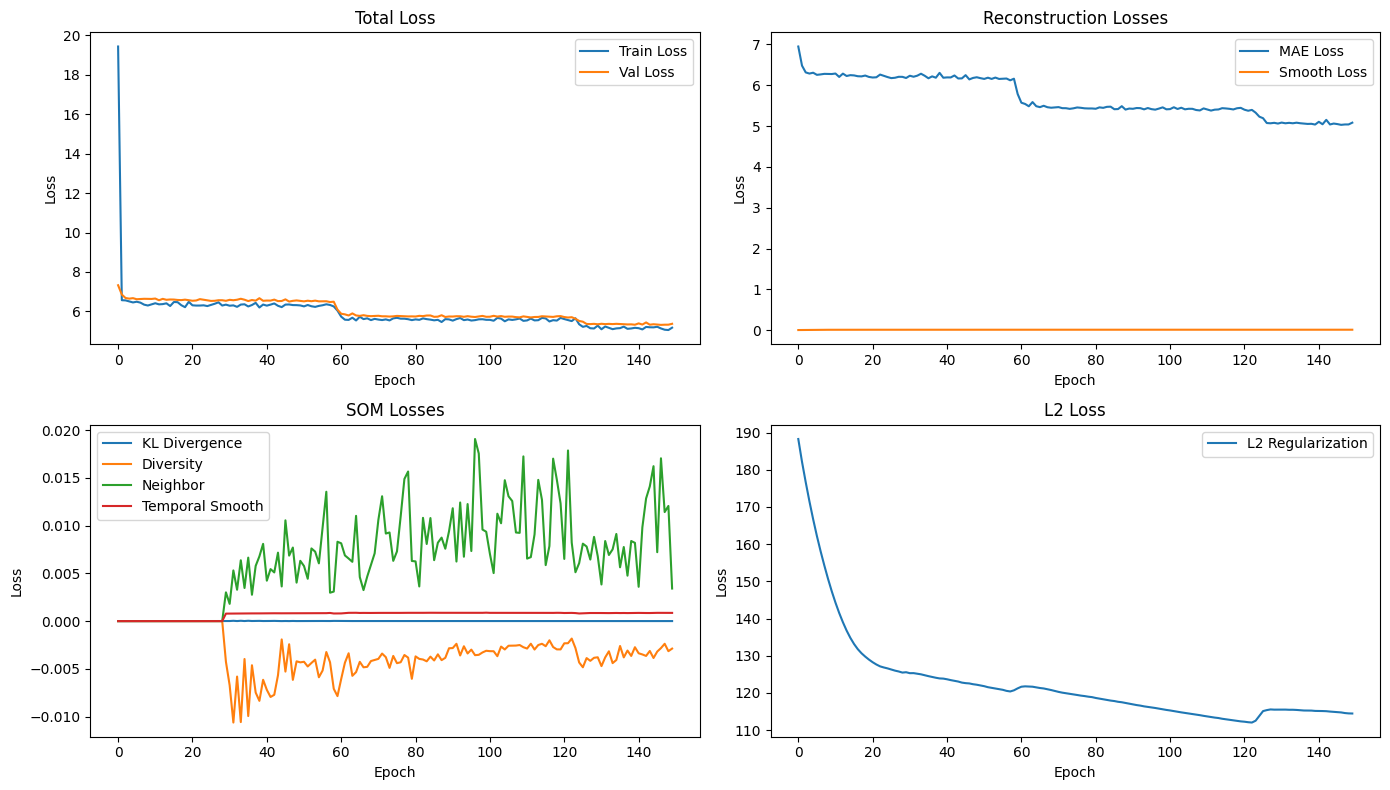

In [7]:
plot_training_history(history)

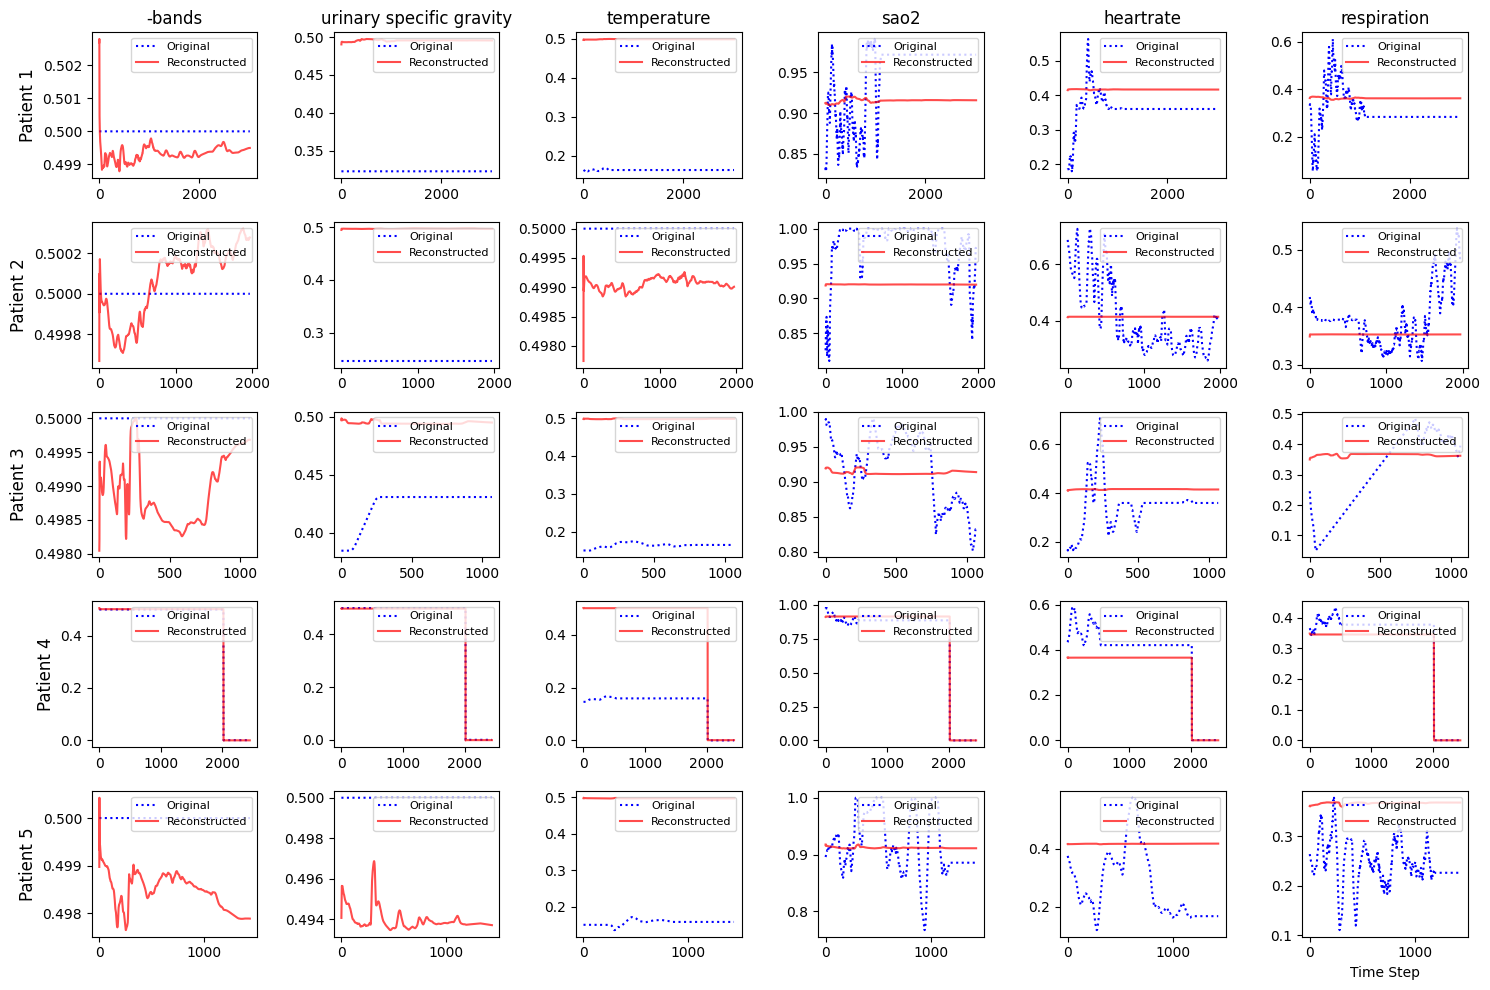

In [10]:
with open('/home/mei/nas/docker/thesis/data/hdf/features.txt', 'r') as f:
    features = [line.strip() for line in f]

selected_feature_indices = [0,142,143,144,145,146]  #

visualize_recons(model, test_loader, num_patients=5, feature_indices=selected_feature_indices, feature_names=features,device=device)

In [ ]:
save_path = '/home/mei/nas/docker/thesis/data/model_results/pre_train/best_model_32——1e-3.pth'
history_path = '/home/mei/nas/docker/thesis/data/model_results/pre_train/history_32——1e-3.json'
model, history = train_model_som(model, train_loader, val_loader, n_epochs=150, save_path=save_path,history_path=history_path,device=device)

Epoch 10: train loss 6.4343 val loss 6.6814 use_som=False
Epoch 20: train loss 6.3075 val loss 6.5693 use_som=False
Epoch 30: train loss 6.5693 val loss 6.7915 use_som=True
Epoch 40: train loss 6.5306 val loss 6.7609 use_som=True
Epoch 50: train loss 6.5914 val loss 6.6692 use_som=True
Epoch 60: train loss 6.4557 val loss 6.6930 use_som=True
Epoch 70: train loss 6.4746 val loss 6.6222 use_som=True
Epoch 80: train loss 6.3591 val loss 6.6495 use_som=True
Epoch 90: train loss 6.3774 val loss 6.5904 use_som=True
Epoch 100: train loss 6.3377 val loss 6.6041 use_som=True
Epoch 110: train loss 6.5149 val loss 6.5811 use_som=True
Epoch 120: train loss 6.3574 val loss 6.5876 use_som=True
Epoch 130: train loss 6.2831 val loss 6.5548 use_som=True
Epoch 140: train loss 6.3208 val loss 6.5929 use_som=True
Epoch 150: train loss 6.2982 val loss 6.5451 use_som=True


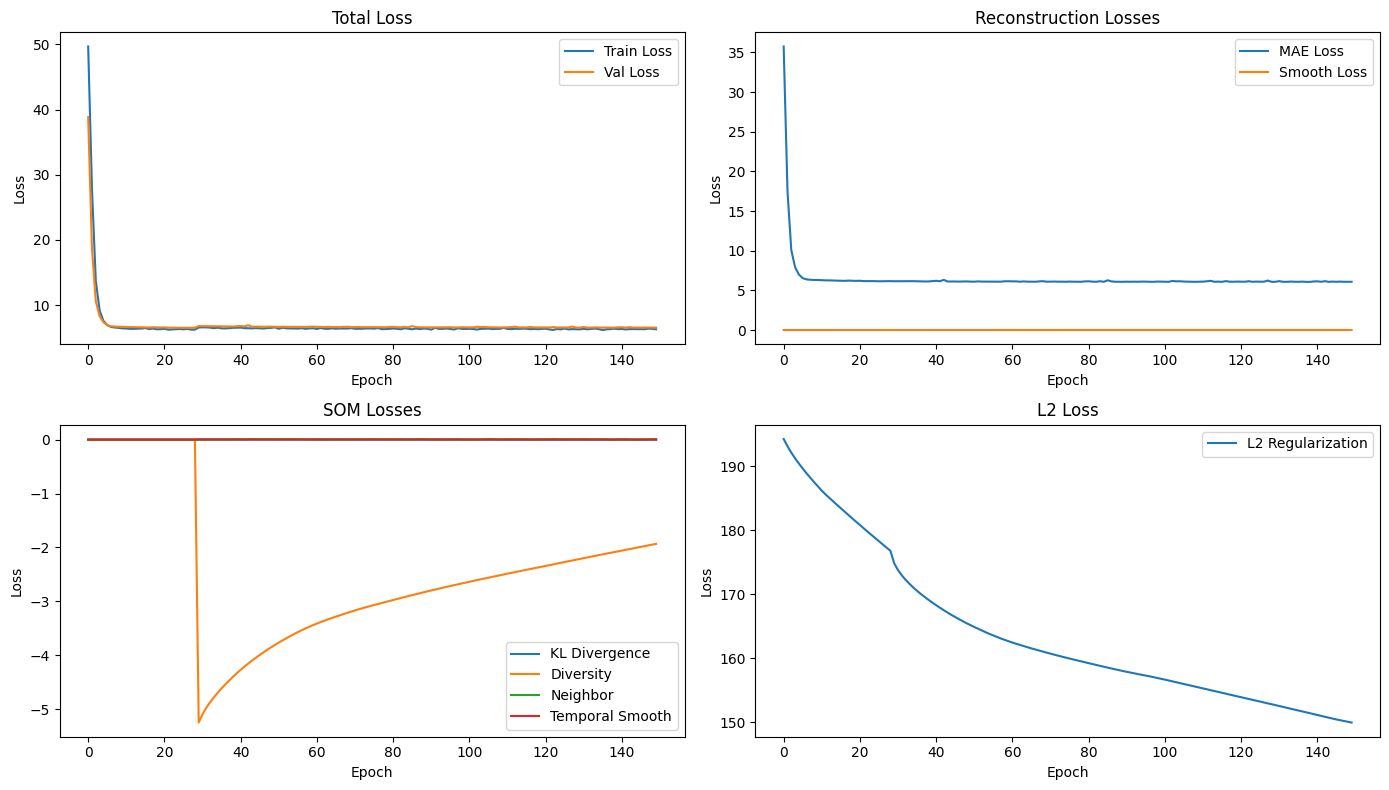

In [7]:
plot_training_history(history)

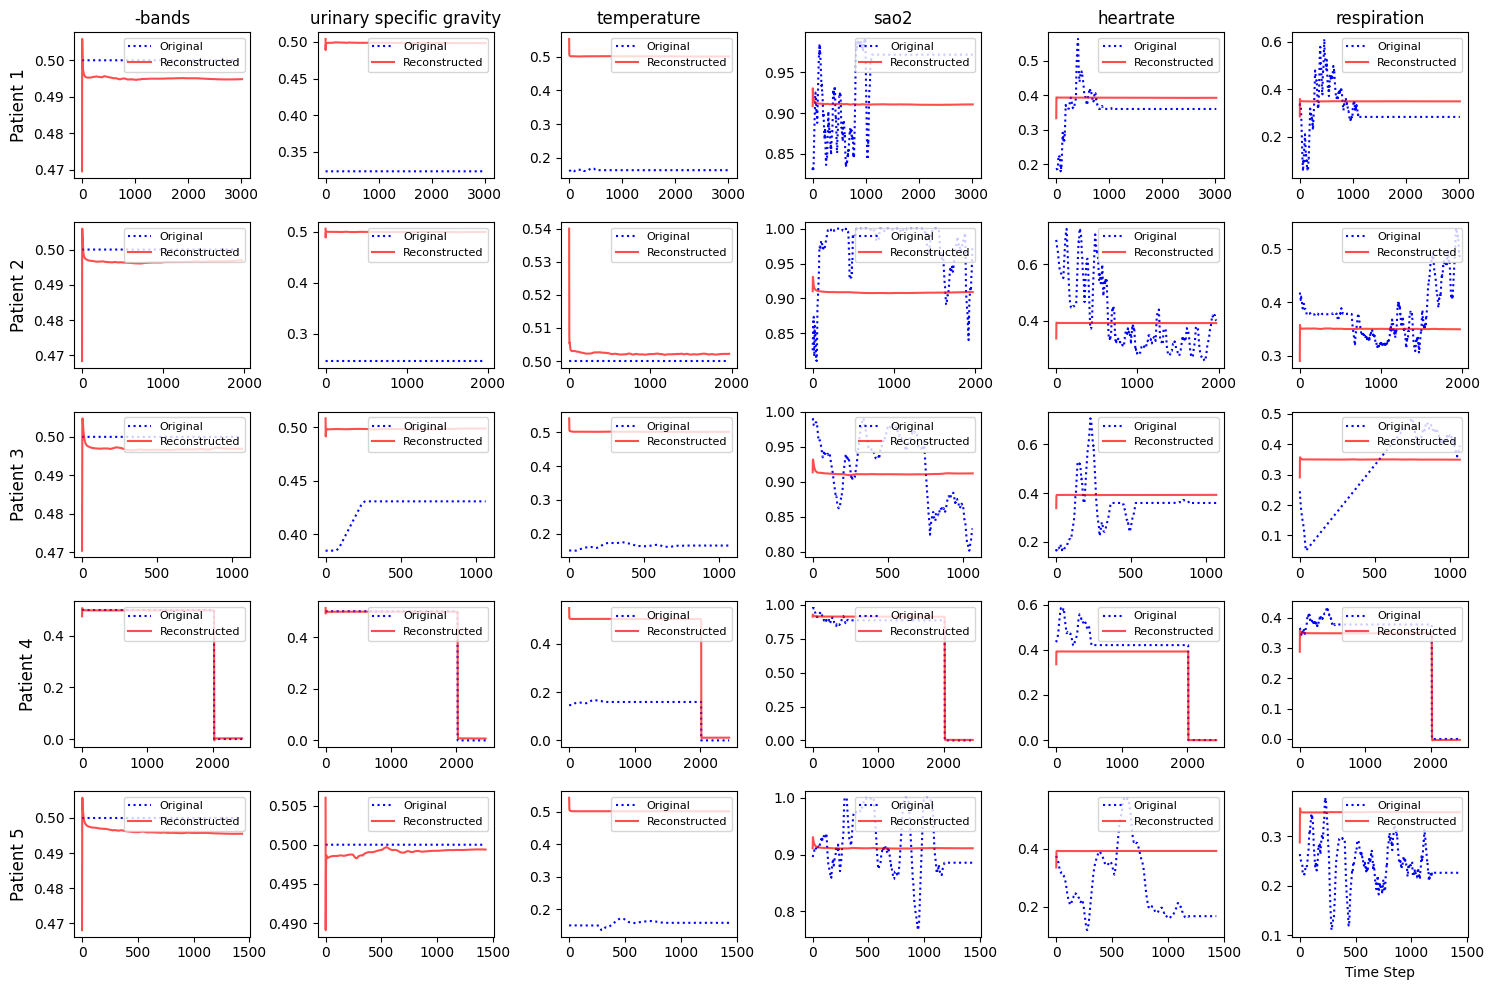

In [8]:
with open('/home/mei/nas/docker/thesis/data/hdf/features.txt', 'r') as f:
    features = [line.strip() for line in f]

selected_feature_indices = [0,142,143,144,145,146]  #

visualize_recons(model, test_loader, num_patients=5, feature_indices=selected_feature_indices, feature_names=features,device=device)

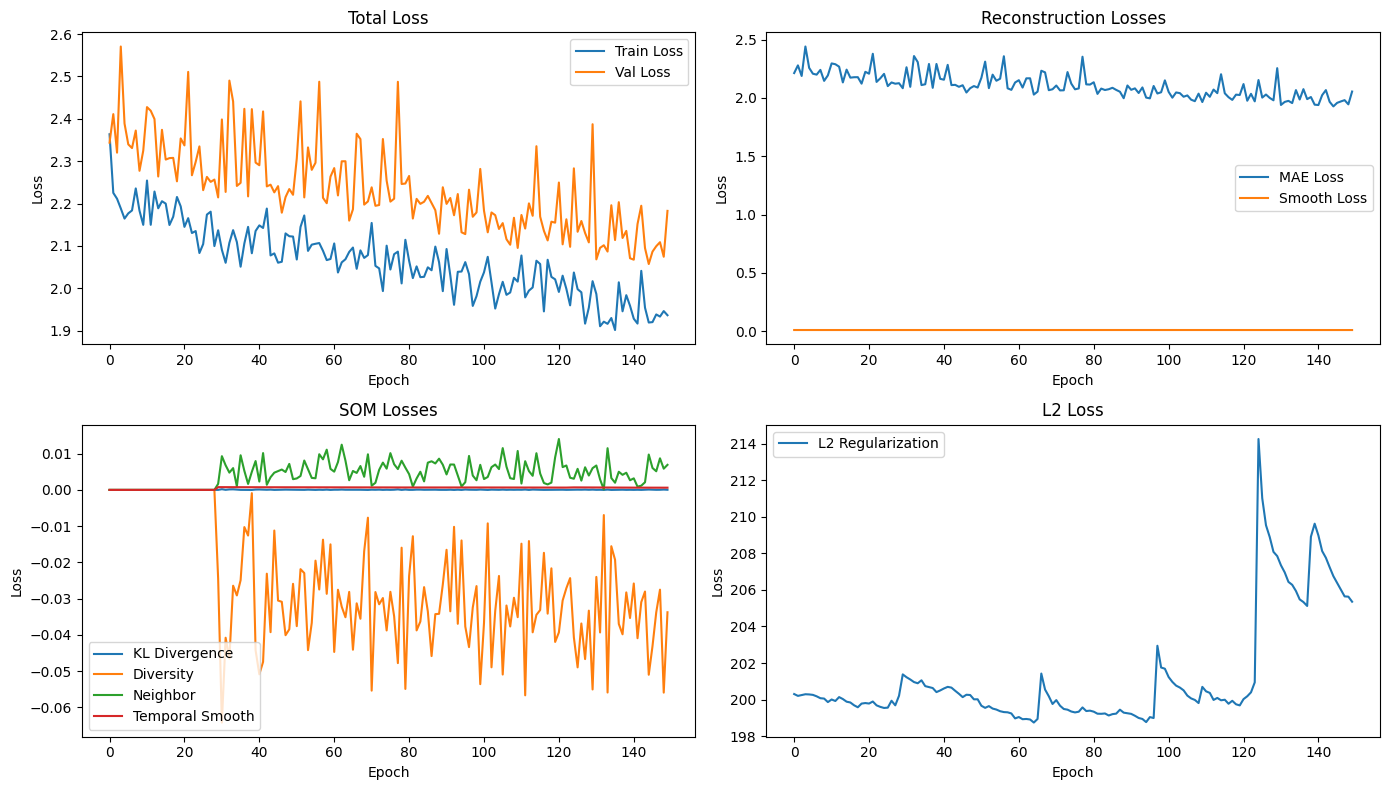

In [9]:
plot_training_history(history)

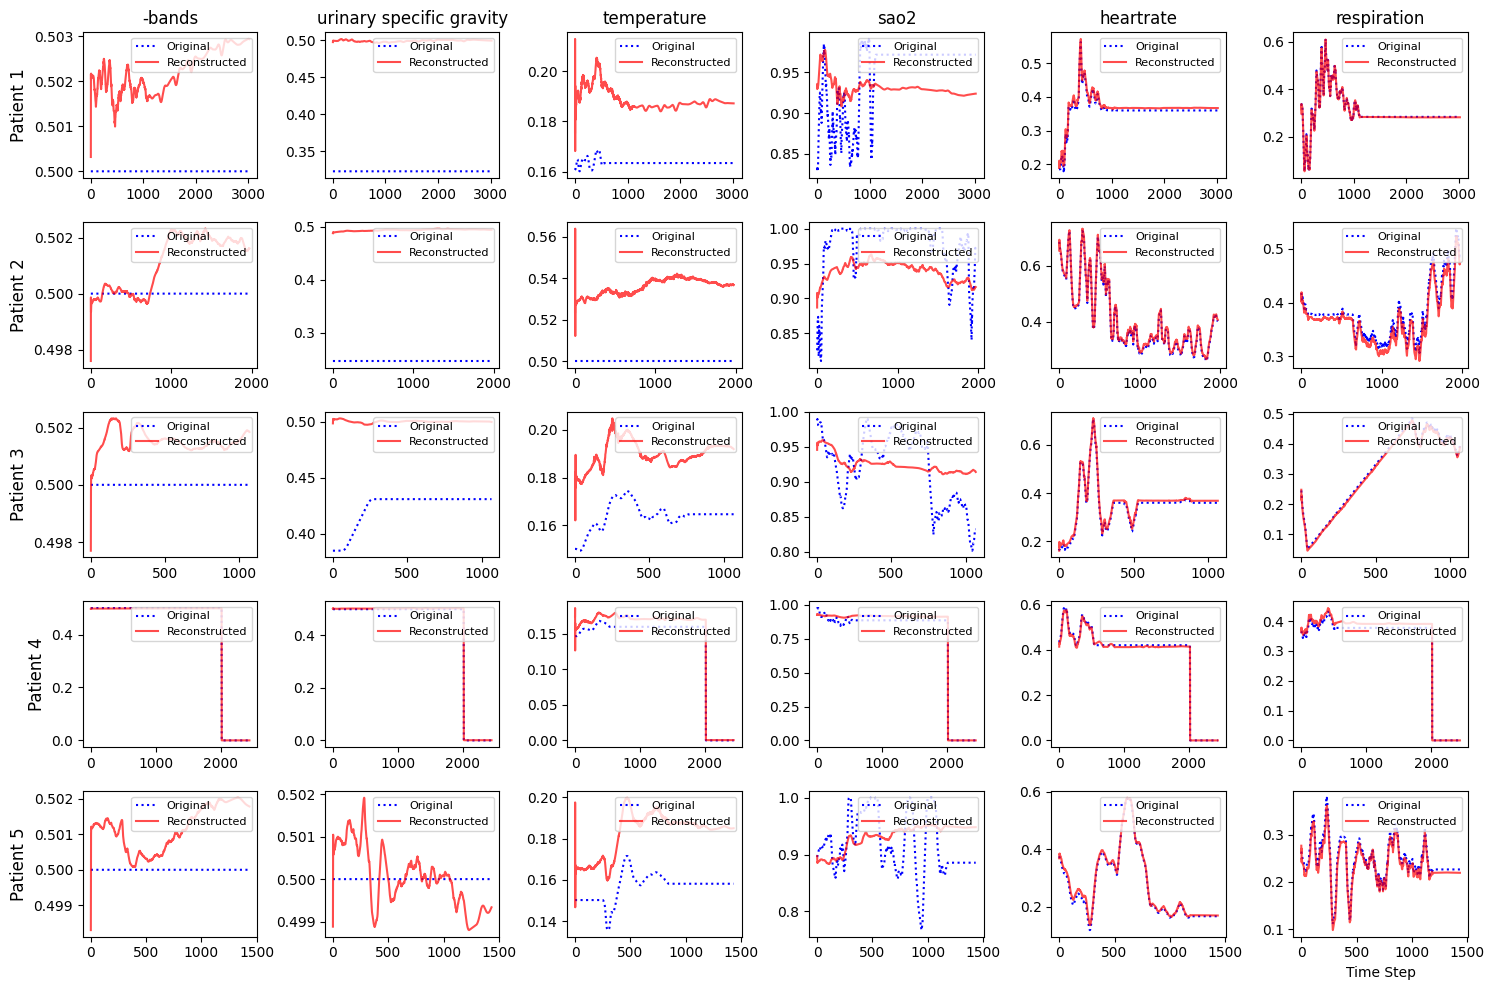

In [13]:
with open('/home/mei/nas/docker/thesis/data/hdf/features.txt', 'r') as f:
    features = [line.strip() for line in f]

selected_feature_indices = [0,142,143,144,145,146]  #

visualize_recons(model, test_loader, num_patients=5, feature_indices=selected_feature_indices, feature_names=features,device=device)

In [ ]:
save_path = '/home/mei/nas/docker/thesis/data/model_results/pre_train/best_model.pth'

model, history = train_model_som(model, train_loader, val_loader, n_epochs=150, save_path=save_path,device=device)

Epoch 10: train loss 4.8327 val loss 4.8452 use_som=False
Epoch 20: train loss 4.1504 val loss 4.2971 use_som=False
Epoch 30: train loss 3.7739 val loss 3.8265 use_som=True
Epoch 40: train loss 3.2772 val loss 3.4618 use_som=True
Epoch 50: train loss 2.9465 val loss 3.1256 use_som=True
Epoch 60: train loss 2.7591 val loss 3.0321 use_som=True
Epoch 70: train loss 2.6028 val loss 2.8103 use_som=True
Epoch 80: train loss 2.6575 val loss 2.7739 use_som=True
Epoch 90: train loss 2.4705 val loss 2.9121 use_som=True
Epoch 100: train loss 2.4446 val loss 2.7239 use_som=True
Epoch 110: train loss 2.3628 val loss 2.4613 use_som=True
Epoch 120: train loss 2.2462 val loss 2.4591 use_som=True
Epoch 130: train loss 2.2476 val loss 2.4180 use_som=True
Epoch 140: train loss 2.1944 val loss 2.3488 use_som=True
Epoch 150: train loss 2.0983 val loss 2.3158 use_som=True


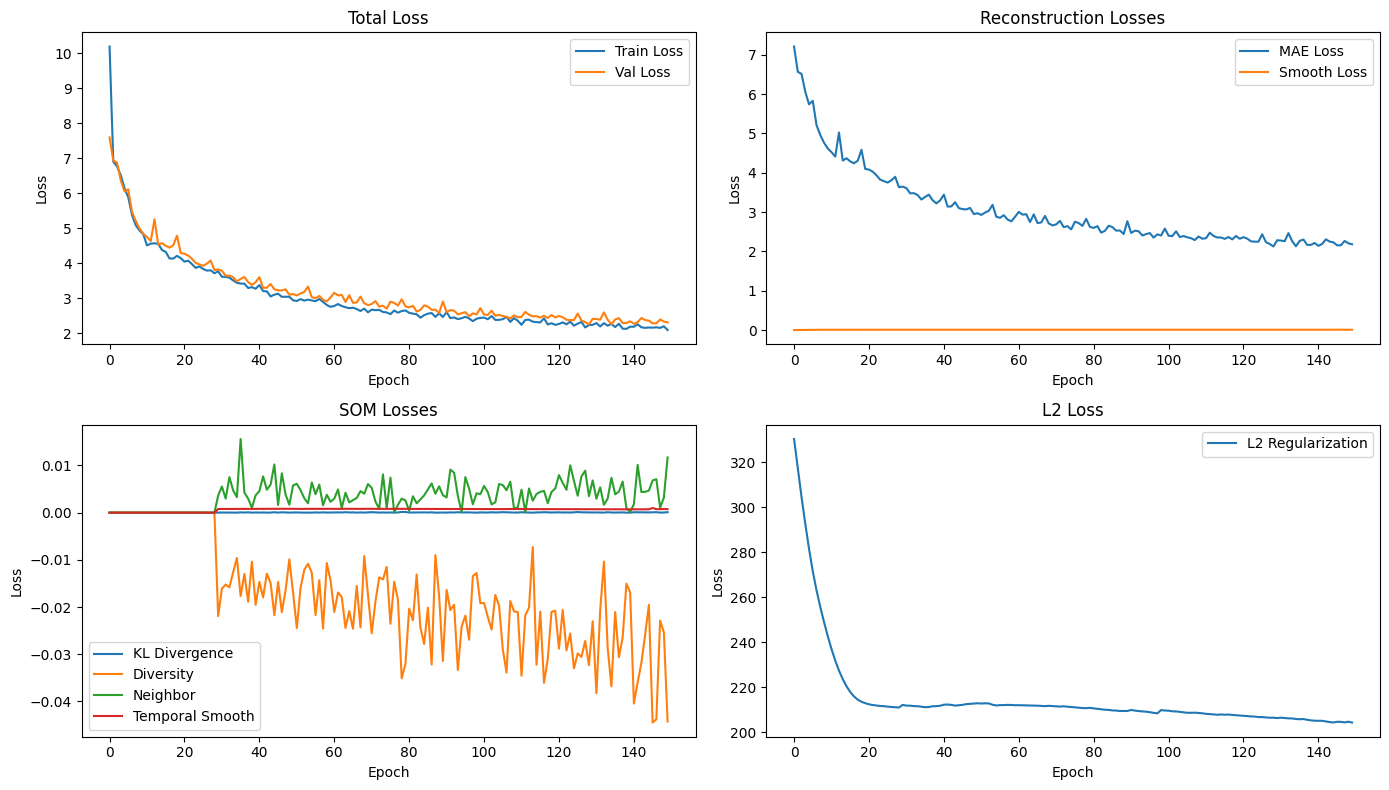

In [6]:
plot_training_history(history)

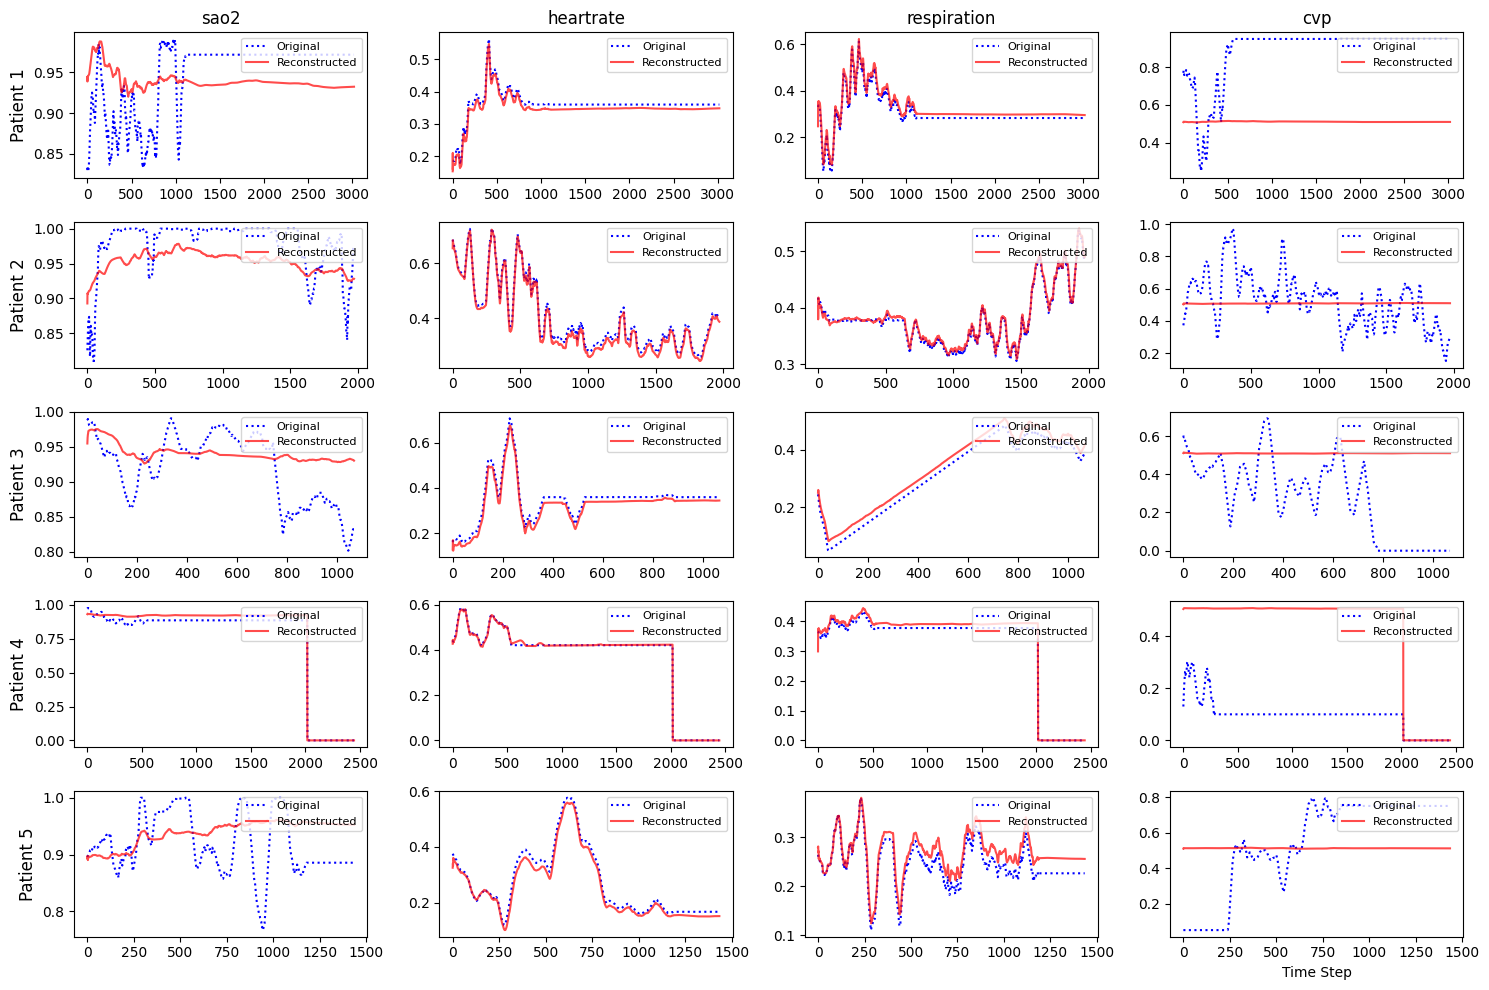

In [7]:
with open('/home/mei/nas/docker/thesis/data/hdf/features.txt', 'r') as f:
    features = [line.strip() for line in f]

selected_feature_indices = [144,145,146,147]  #

visualize_recons(model, test_loader, num_patients=5, feature_indices=selected_feature_indices, feature_names=features,device=device)

In [ ]:
save_path = '/home/mei/nas/docker/thesis/data/model_results/pre_train/best_model_vp.pth'

model, history = train_model_som(model, train_loader, val_loader, n_epochs=100, save_path=save_path,device=device)

Epoch 10: train loss 4.2973 val loss 4.4839 use_som=False
Epoch 20: train loss 3.7956 val loss 3.9643 use_som=False
Epoch 30: train loss 3.4456 val loss 3.5481 use_som=False
Epoch 40: train loss 3.3638 val loss 3.5657 use_som=True
Epoch 50: train loss 3.0387 val loss 3.3798 use_som=True
Epoch 60: train loss 2.8084 val loss 3.1075 use_som=True
Epoch 70: train loss 2.7359 val loss 2.8792 use_som=True
Epoch 80: train loss 2.6354 val loss 2.7957 use_som=True
Epoch 90: train loss 2.5714 val loss 2.8009 use_som=True
Epoch 100: train loss 2.5030 val loss 2.7035 use_som=True


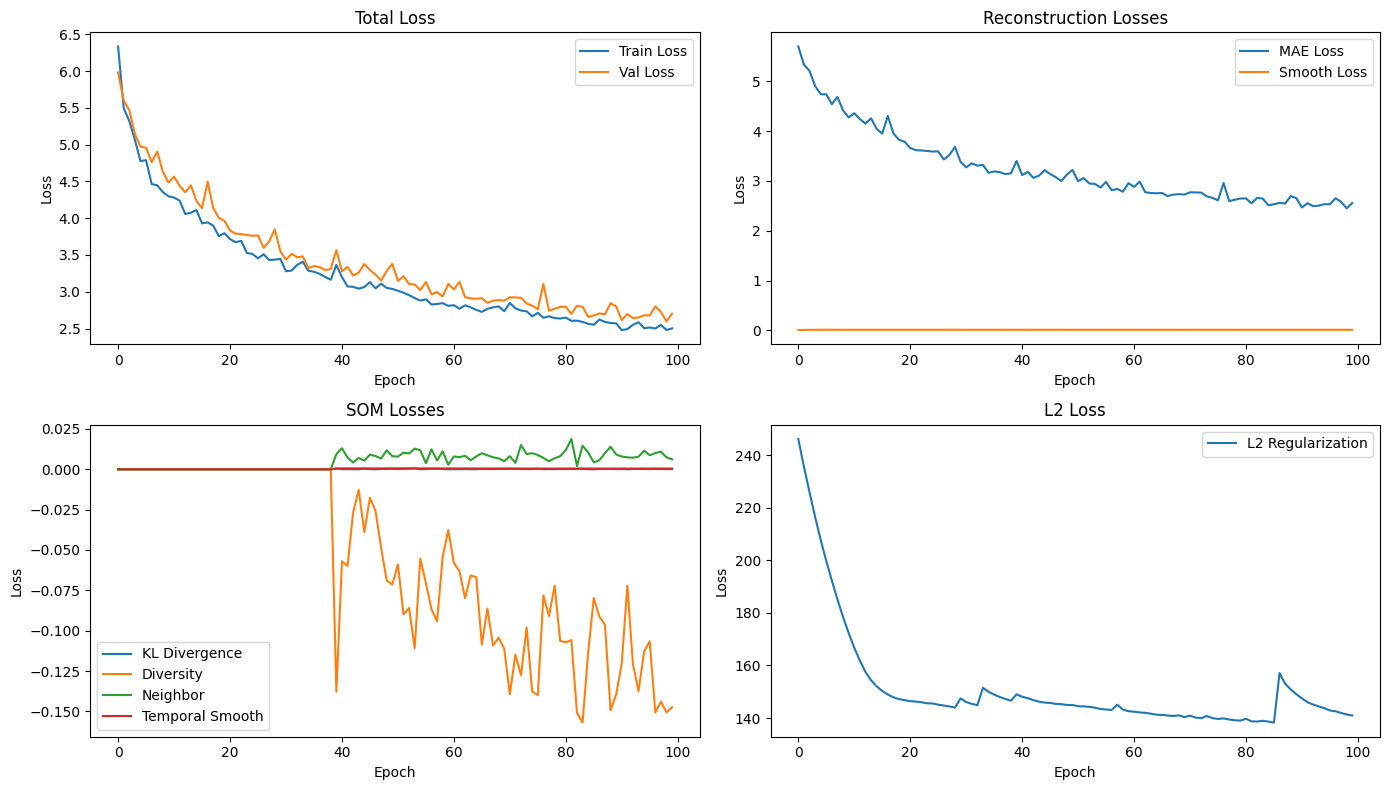

In [10]:
plot_training_history(history)

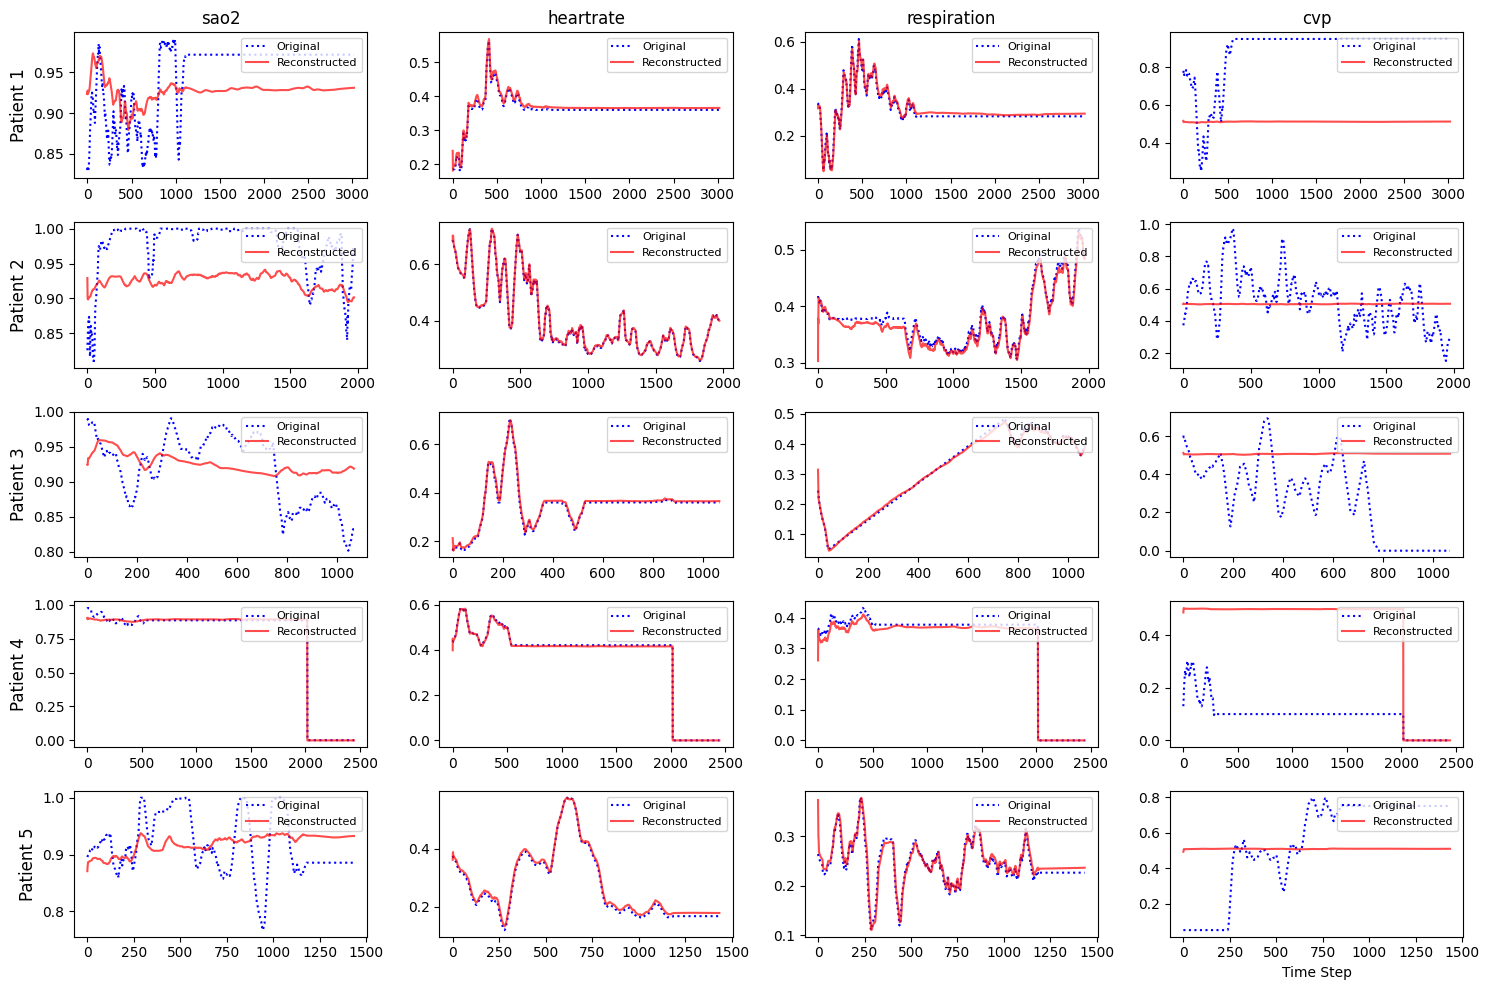

In [11]:
with open('/home/mei/nas/docker/thesis/data/hdf/features.txt', 'r') as f:
    features = [line.strip() for line in f]

selected_feature_indices = [144,145,146,147]  # 
visualize_recons(model, test_loader, num_patients=5, feature_indices=selected_feature_indices, feature_names=features,device=device)

In [14]:

vital_signs_train = '/home/mei/nas/docker/thesis/data/ts/vital_signs_train.h5'
vital_signs_val = '/home/mei/nas/docker/thesis/data/ts/vital_signs_val.h5'
vital_signs_test = '/home/mei/nas/docker/thesis/data/ts/vital_signs_test.h5'

train_dataset = VitalSignsDataset(vital_signs_train)
val_dataset = VitalSignsDataset(vital_signs_val)
test_dataset = VitalSignsDataset(vital_signs_test)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, collate_fn=vital_pre_train)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False, collate_fn=vital_pre_train) 
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False, collate_fn=vital_pre_train)

In [15]:
from torch.utils.data import DataLoader, TensorDataset

small_data_iter = iter(train_loader) 
inputs, lengths = next(small_data_iter)  
inputs = inputs[:,:,1:]  # Remove the first feature (index 0)
small_dataset = TensorDataset(inputs, lengths)
small_train_loader_ts = DataLoader(small_dataset, batch_size=len(inputs), shuffle=True)


In [16]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

n_features = 11  
embedding_dim =8
n_heads = 2
model_ts = RecurrentAutoencoder(n_features, embedding_dim,n_heads).to(device)


In [17]:
save_path = '/home/mei/nas/docker/thesis/data/model_results/pre_train/best_model_ts.pth'

model_ts, history_ts = train_model_som(model_ts, small_train_loader_ts , small_train_loader_ts , n_epochs=550, save_path=save_path,device=device)

Epoch 10: train loss 3.9314 val loss 3.9028 use_som=False
Epoch 20: train loss 3.7520 val loss 3.7383 use_som=False
Epoch 30: train loss 3.5728 val loss 3.5586 use_som=False
Epoch 40: train loss 3.3909 val loss 3.3691 use_som=False
Epoch 50: train loss 3.0974 val loss 3.0582 use_som=False
Epoch 60: train loss 2.6952 val loss 2.6709 use_som=False
Epoch 70: train loss 2.3880 val loss 2.3597 use_som=False
Epoch 80: train loss 2.1311 val loss 2.1042 use_som=False
Epoch 90: train loss 1.9249 val loss 1.9059 use_som=False
Epoch 100: train loss 1.7497 val loss 1.7345 use_som=False
Epoch 110: train loss 1.6125 val loss 1.5989 use_som=False
Epoch 120: train loss 1.4766 val loss 1.4624 use_som=False
Epoch 130: train loss 1.3561 val loss 1.3439 use_som=False
Epoch 140: train loss 1.2544 val loss 1.2440 use_som=False
Epoch 150: train loss 1.1741 val loss 1.1646 use_som=False
Epoch 160: train loss 1.1149 val loss 1.1083 use_som=False
Epoch 170: train loss 1.0685 val loss 1.0620 use_som=False
Epoch 

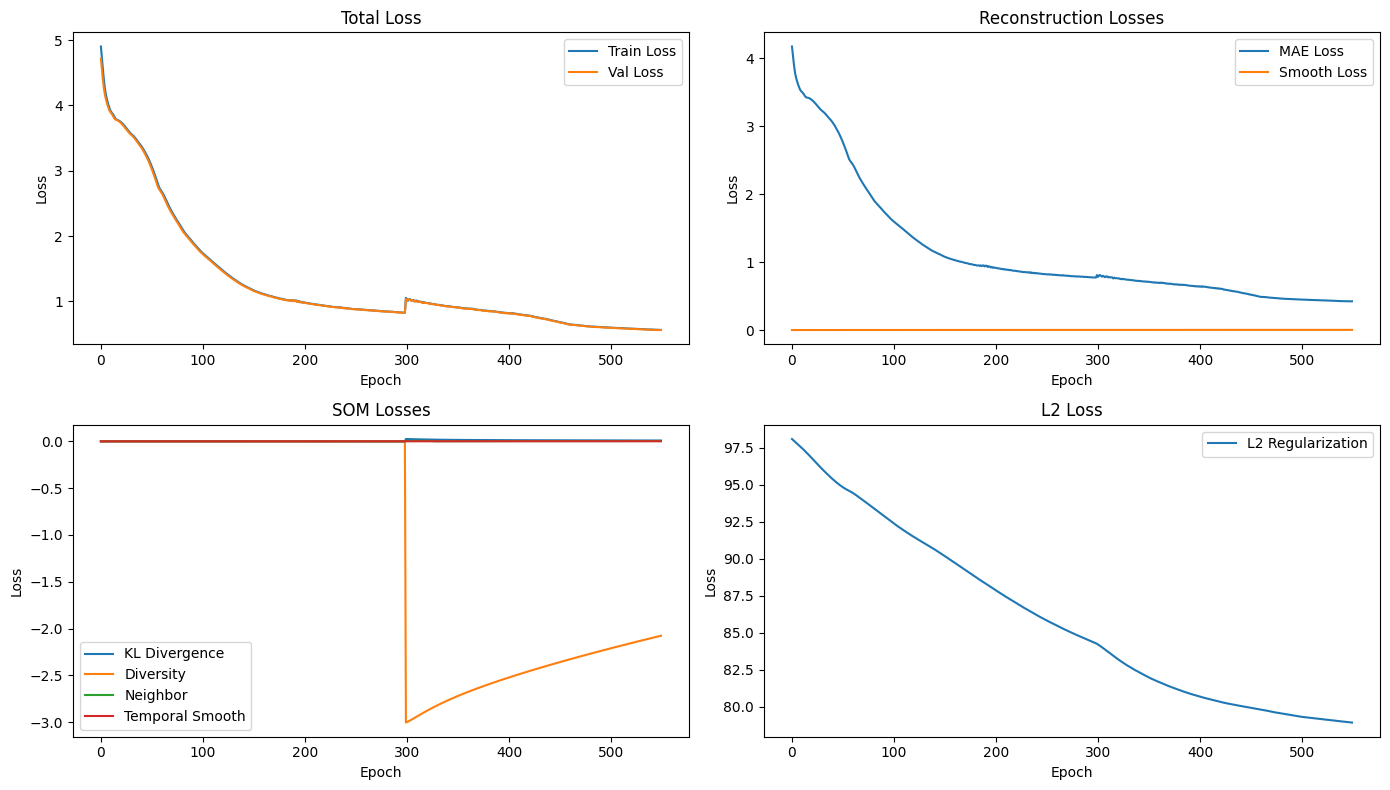

In [18]:
## em = 12 ，som =true
plot_training_history(history_ts)

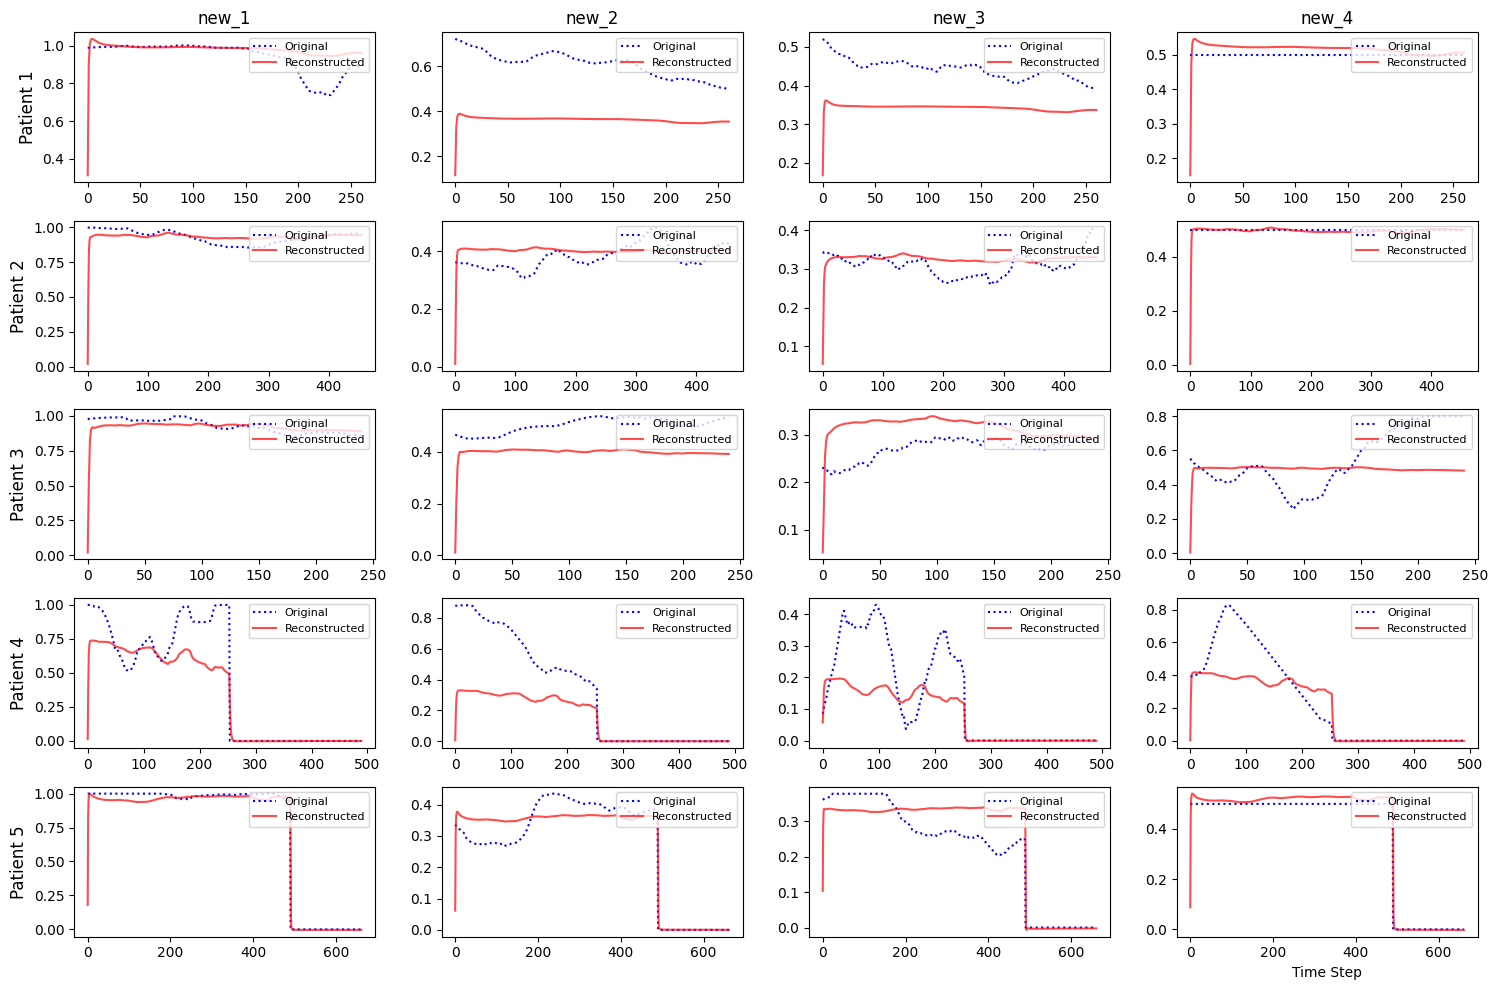

In [19]:
with open('/home/mei/nas/docker/thesis/data/hdf/features.txt', 'r') as f:
    features = [line.strip() for line in f]
    features = features[143:]
    features = [f"new_{i}" for i, feat in enumerate(features)] 
selected_feature_indices = [1,2,3,4]  # 
visualize_recons(model_ts, small_train_loader_ts, num_patients=5, feature_indices=selected_feature_indices, feature_names=features,device=device)

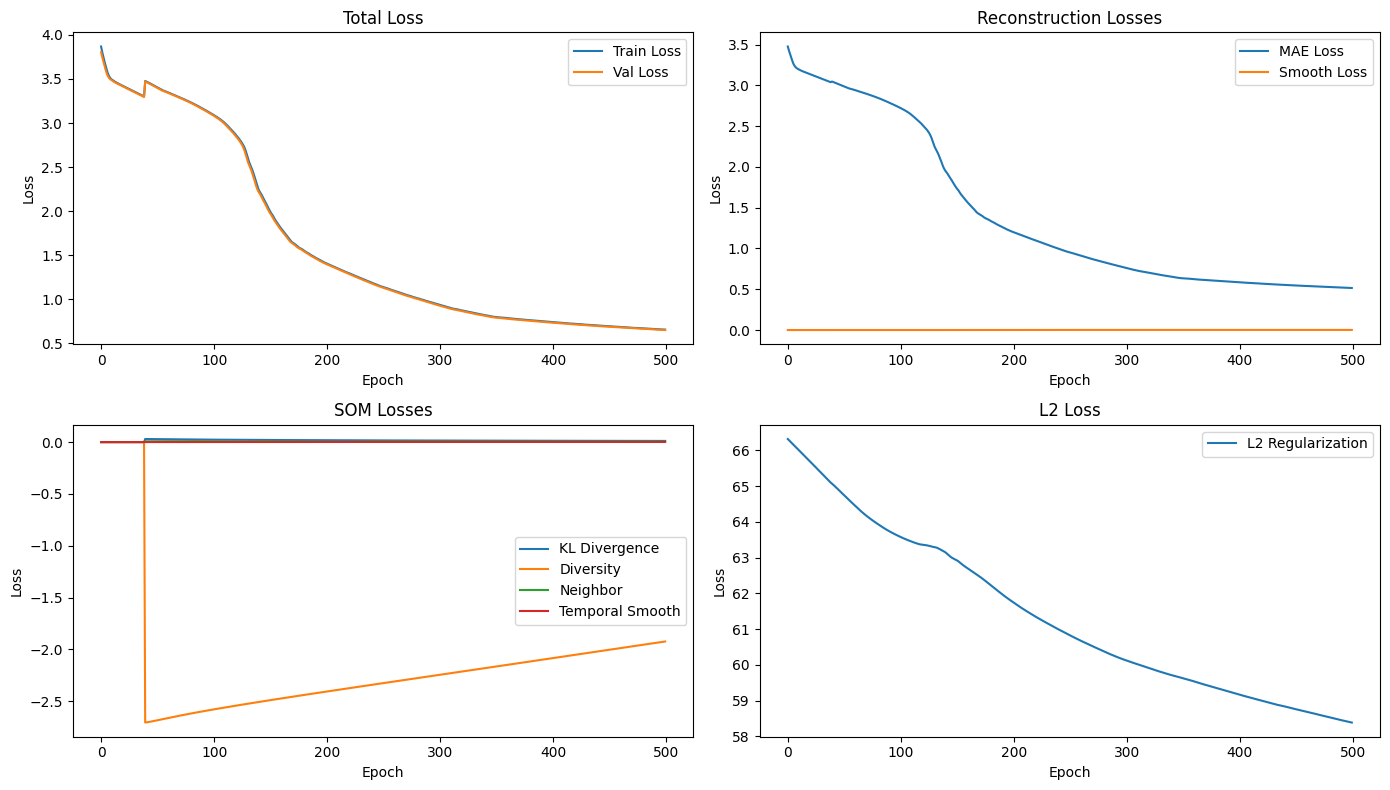

In [6]:
## em = 4 ，som =true
plot_training_history(history_ts)

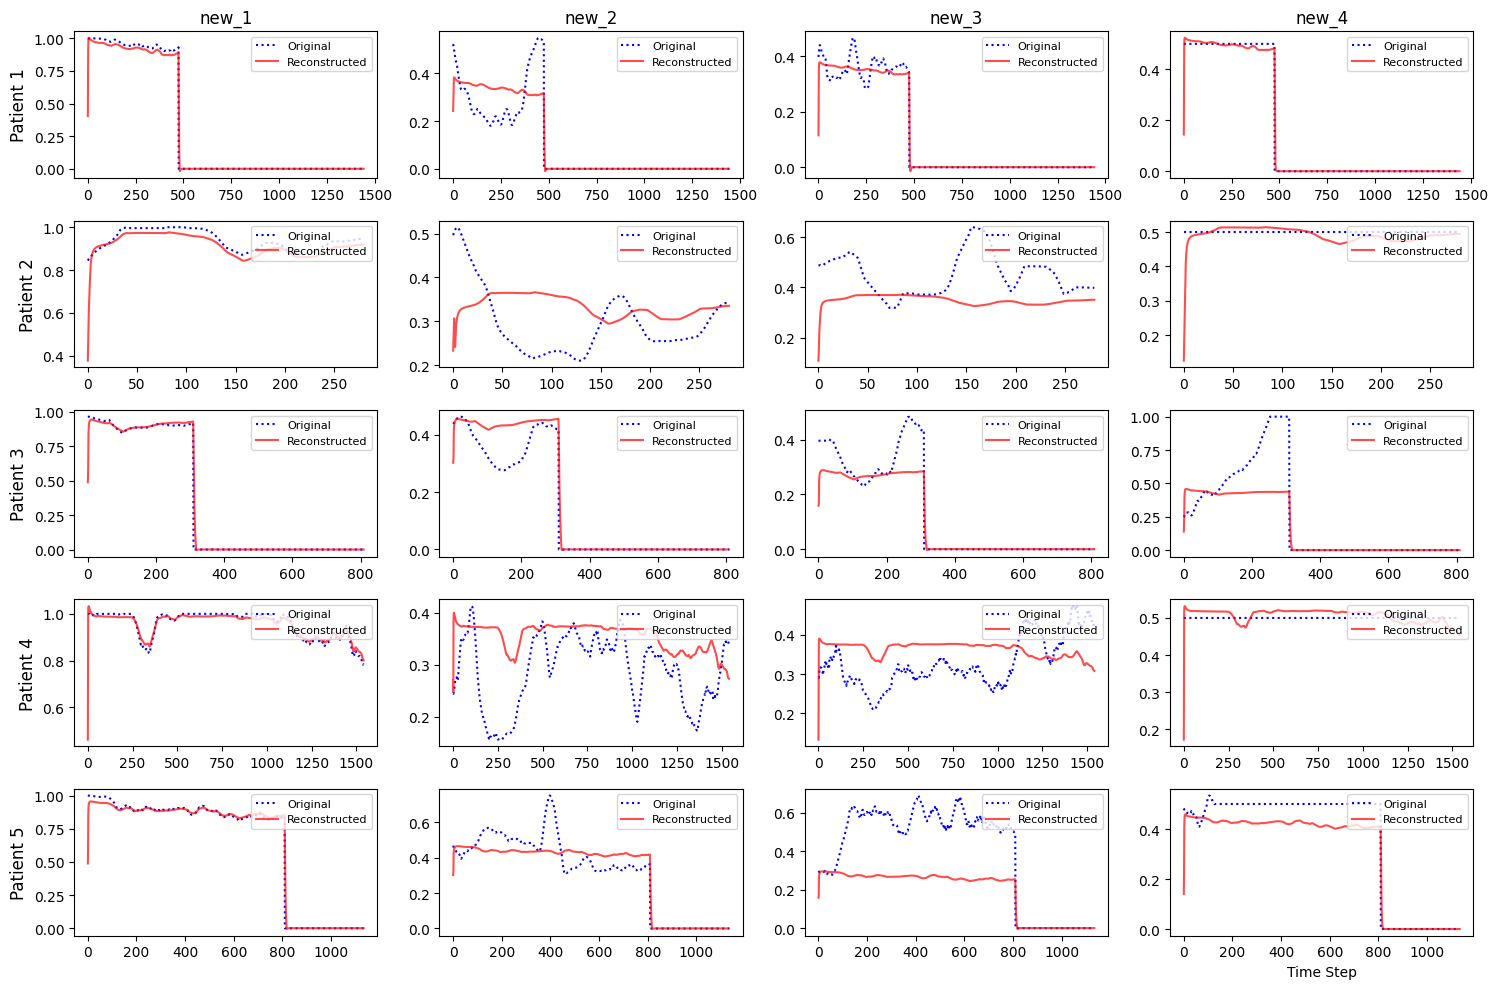

In [7]:
with open('/home/mei/nas/docker/thesis/data/hdf/features.txt', 'r') as f:
    features = [line.strip() for line in f]
    features = features[143:]
    features = [f"new_{i}" for i, feat in enumerate(features)] 
selected_feature_indices = [1,2,3,4]  # 
visualize_recons(model_ts, small_train_loader_ts, num_patients=5, feature_indices=selected_feature_indices, feature_names=features,device=device)

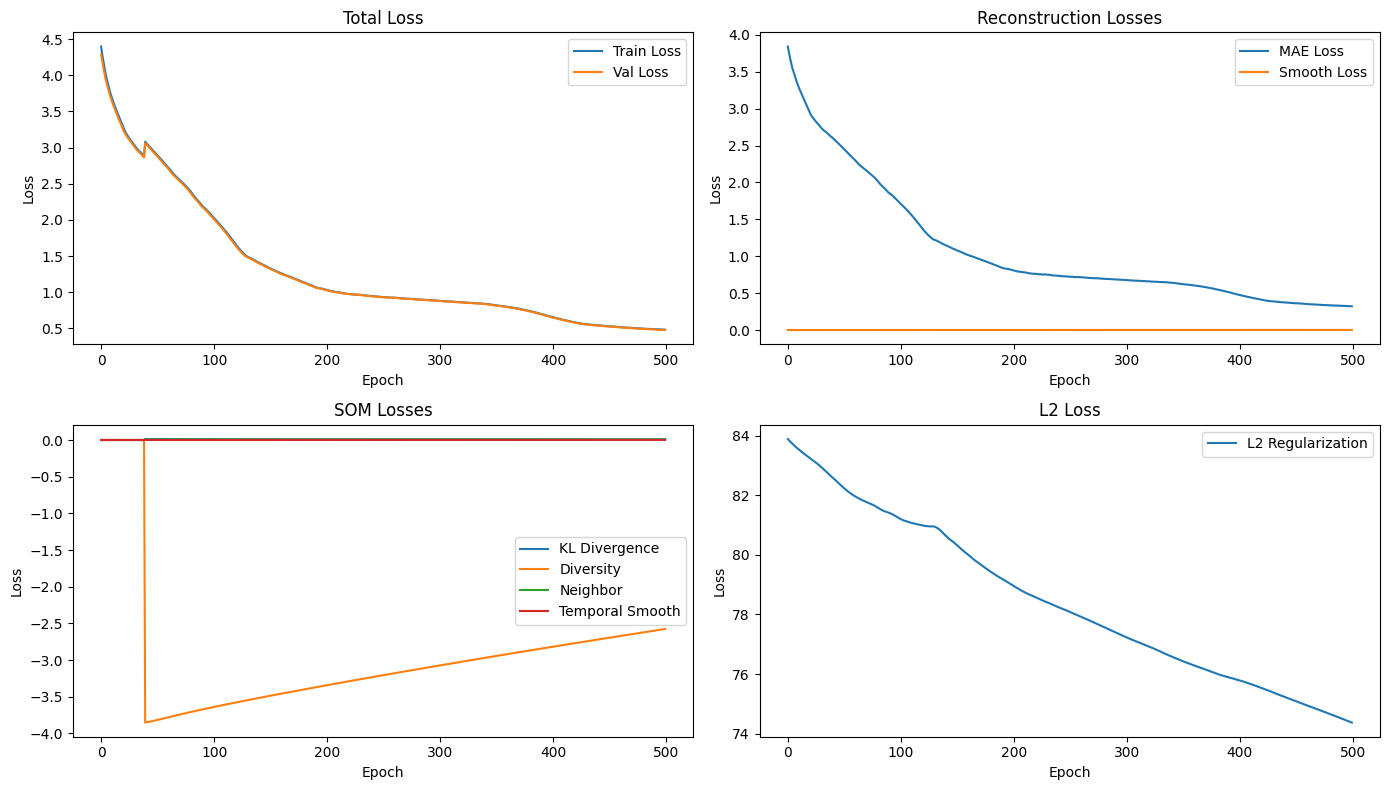

In [6]:
## em = 8 ，som =true
plot_training_history(history_ts)

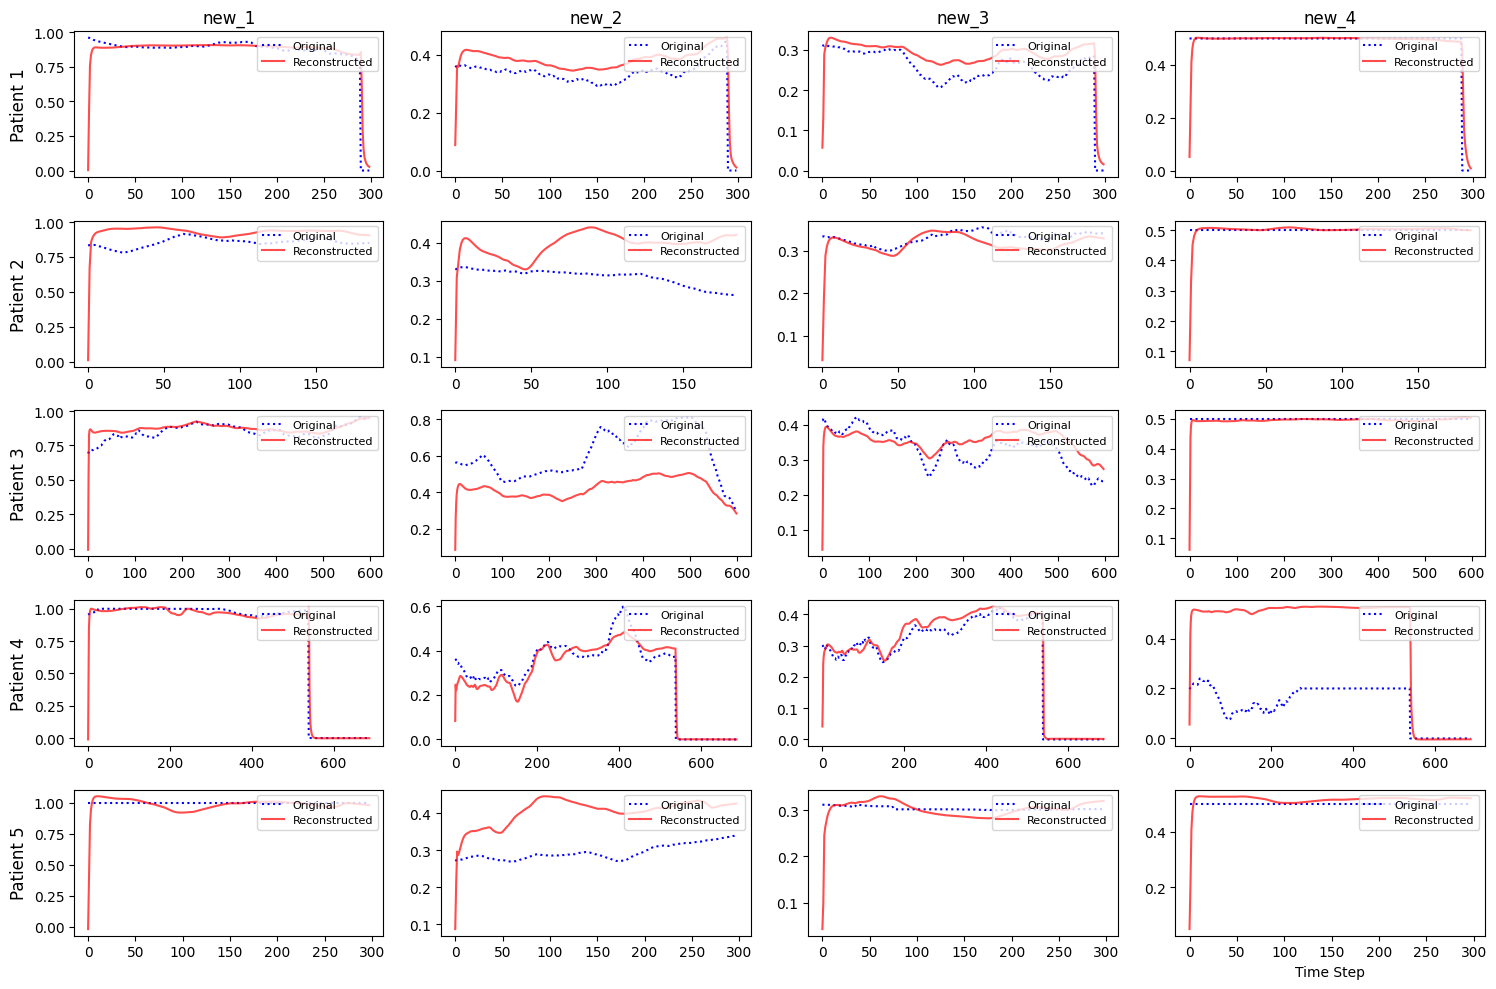

In [7]:
with open('/home/mei/nas/docker/thesis/data/hdf/features.txt', 'r') as f:
    features = [line.strip() for line in f]
    features = features[143:]
    features = [f"new_{i}" for i, feat in enumerate(features)] 
selected_feature_indices = [1,2,3,4]  # 
visualize_recons(model_ts, small_train_loader_ts, num_patients=5, feature_indices=selected_feature_indices, feature_names=features,device=device)

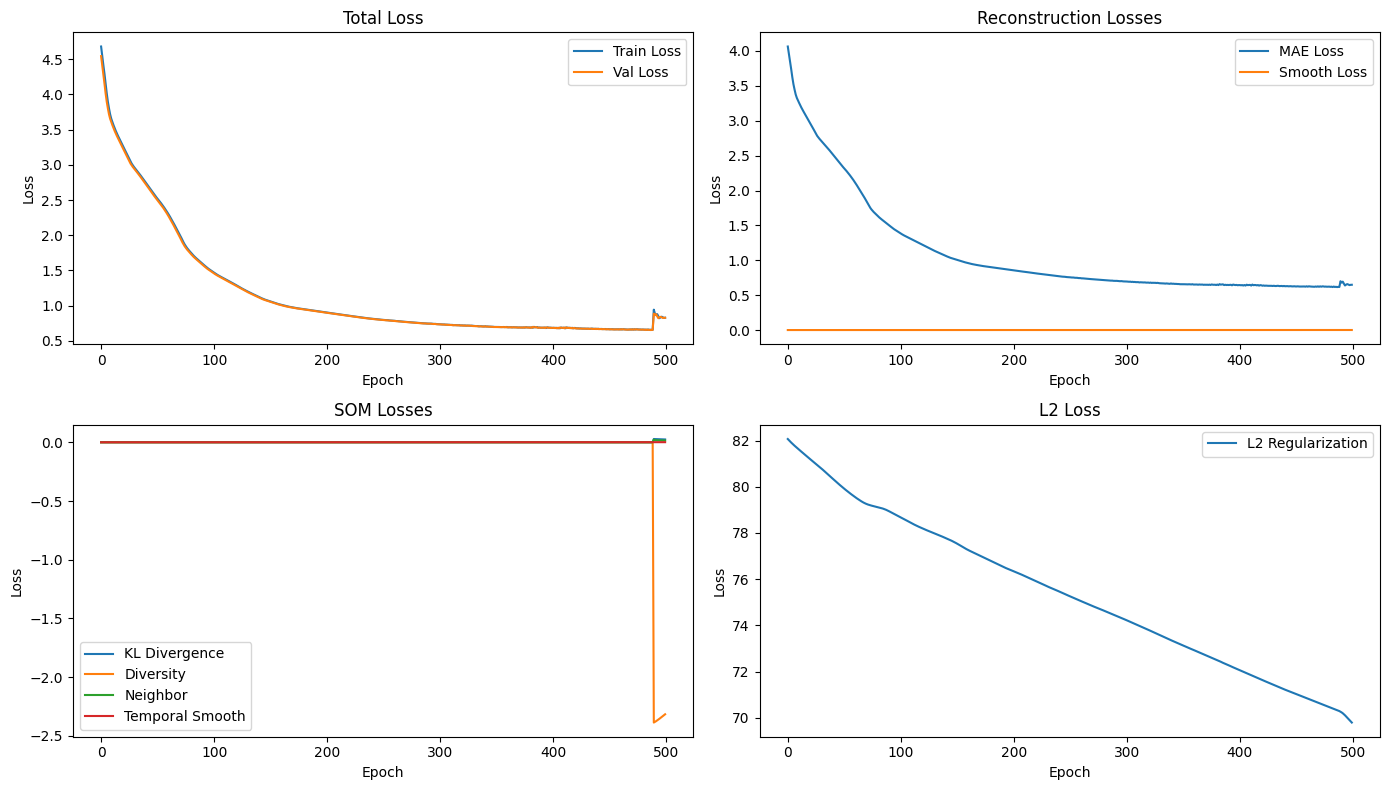

In [6]:
## em = 8 ，som =false
plot_training_history(history_ts)

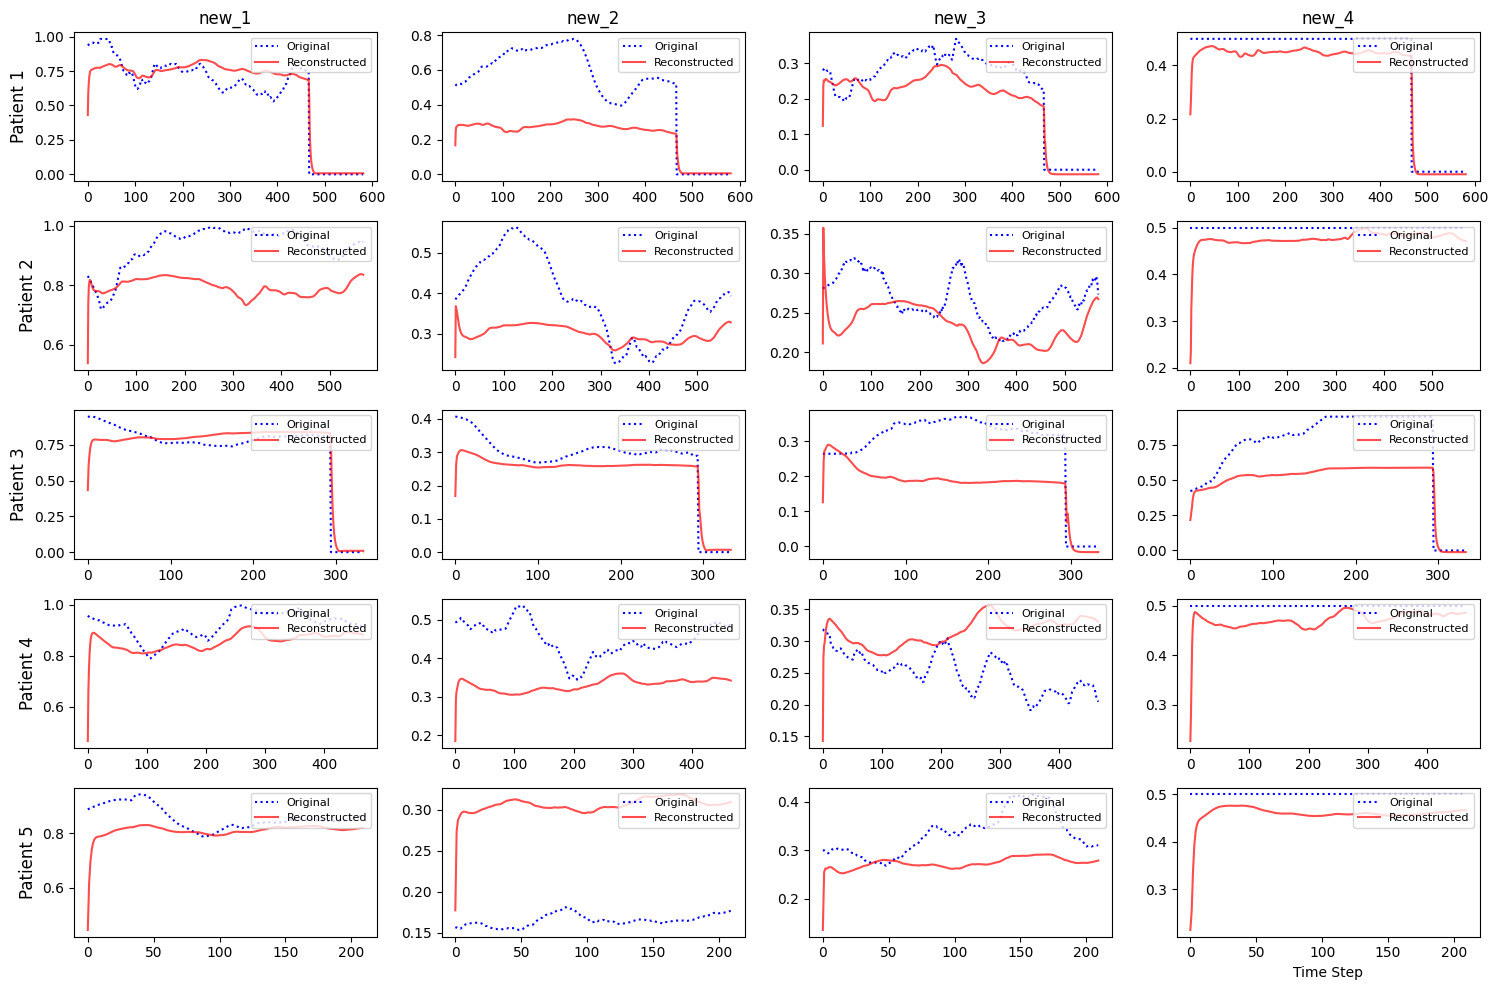

In [7]:
with open('/home/mei/nas/docker/thesis/data/hdf/features.txt', 'r') as f:
    features = [line.strip() for line in f]
    features = features[143:]
    features = [f"new_{i}" for i, feat in enumerate(features)] 
selected_feature_indices = [1,2,3,4]  # 
visualize_recons(model_ts, small_train_loader_ts, num_patients=5, feature_indices=selected_feature_indices, feature_names=features,device=device)

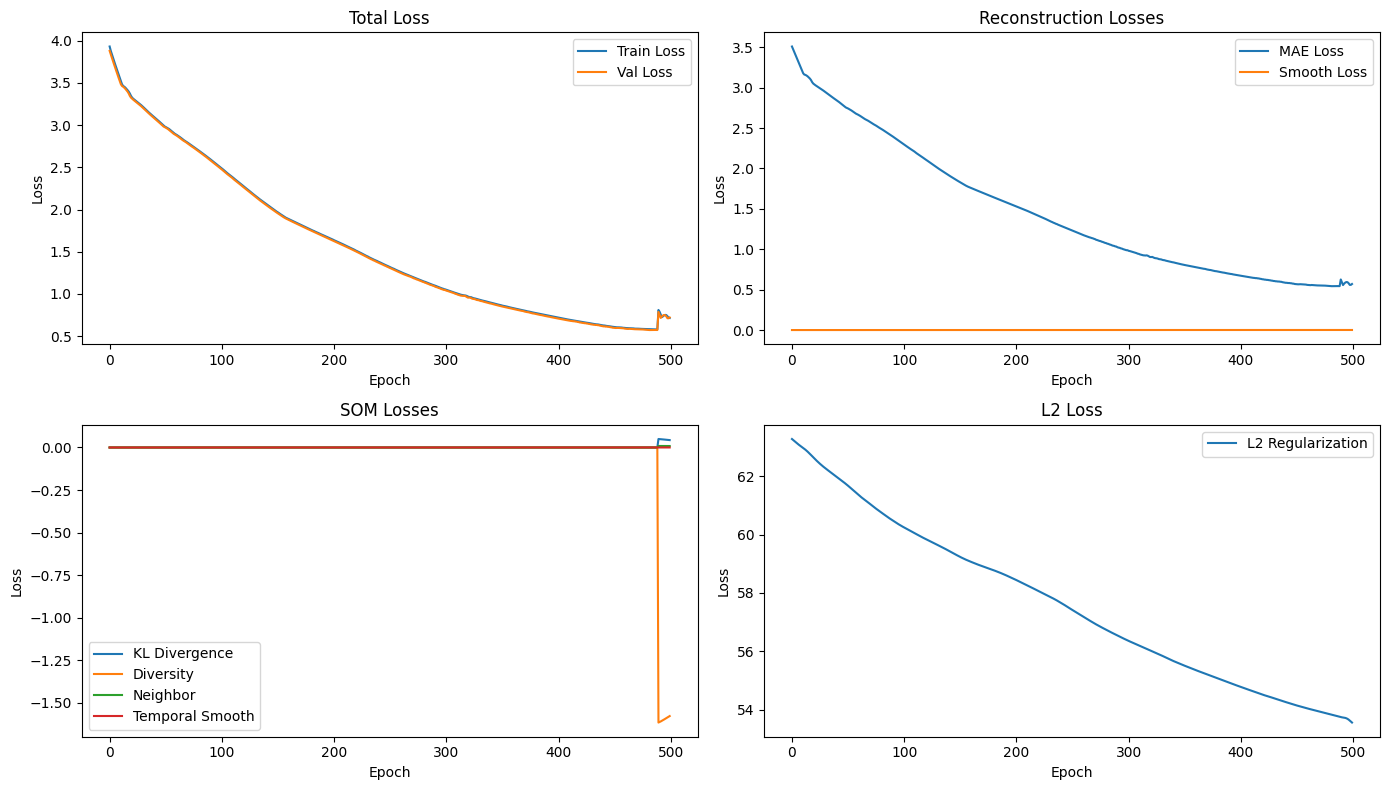

In [ ]:
## em = 4 ,som=false
plot_training_history(history_ts)

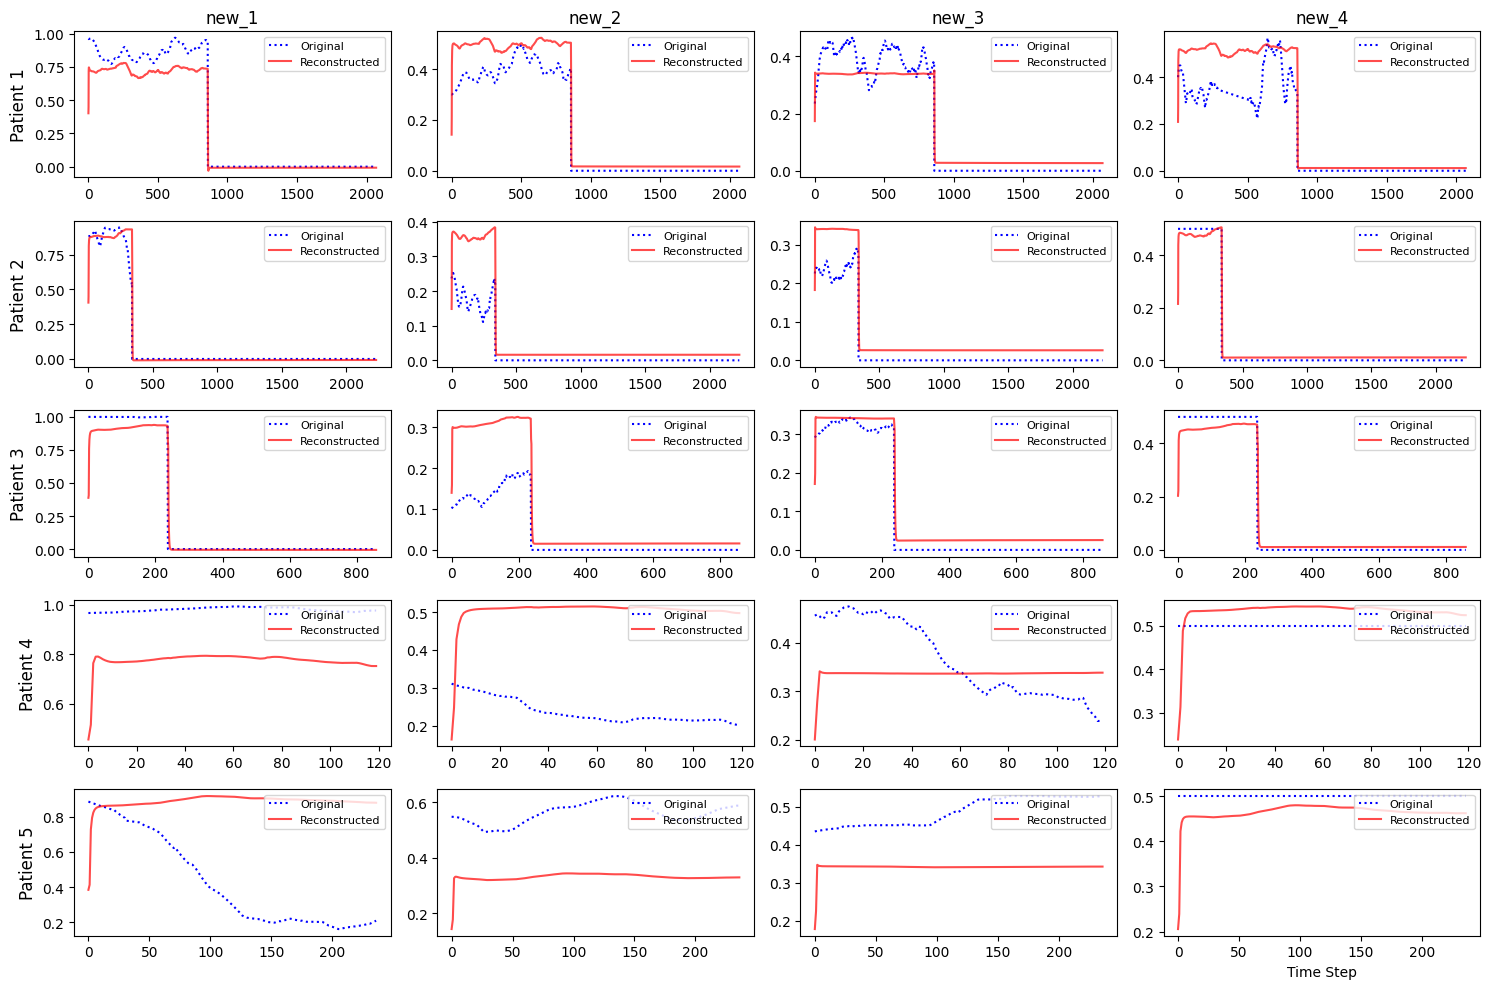

In [8]:
with open('/home/mei/nas/docker/thesis/data/hdf/features.txt', 'r') as f:
    features = [line.strip() for line in f]
    features = features[143:]
    features = [f"new_{i}" for i, feat in enumerate(features)] 
selected_feature_indices = [1,2,3,4]  # 
visualize_recons(model_ts, small_train_loader_ts, num_patients=5, feature_indices=selected_feature_indices, feature_names=features,device=device)

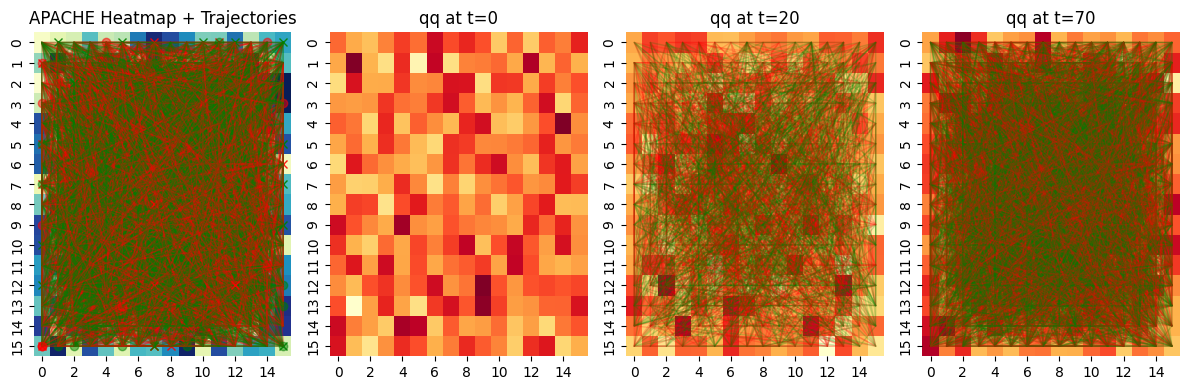

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Mock data
som_dim = (16, 16)
sd = som_dim[0] * som_dim[1]
num_samples = 100
timesteps = 80

# Trajectory positions (k_all): integers in [0, sd)
k_all = np.random.randint(0, sd, size=(num_samples, timesteps))

# Soft assignments (qq): [num_samples, timesteps, sd]
qq = np.random.rand(num_samples, timesteps, sd)
qq /= qq.sum(axis=-1, keepdims=True)  # Normalize

# Labels: 0 = survived (green), 1 = died (red)
labels_val_all = np.random.randint(0, 2, size=(num_samples,))

# APACHE-like clust_matr1 for left heatmap
clust_matr1 = np.random.rand(sd)
clust_matr1_reshaped = clust_matr1.reshape(som_dim)

# Coordinate helpers
def get_coords(indices):
    return np.array([(i // som_dim[1], i % som_dim[1]) for i in indices])

# Create the figure
fig = plt.figure(figsize=(12, 4))

# --- Left: Main heatmap with trajectories ---
ax1 = fig.add_subplot(1, 4, 1)
sns.heatmap(clust_matr1_reshaped, ax=ax1, cmap="YlGnBu", cbar=False)
ax1.set_title("APACHE Heatmap + Trajectories")

# Overlay trajectories
for i in range(num_samples):
    coords = get_coords(k_all[i])
    color = 'green' if labels_val_all[i] == 0 else 'red'
    ax1.plot(coords[:, 1] + 0.5, coords[:, 0] + 0.5, color=color, alpha=0.3, linewidth=1)
    ax1.plot(coords[0, 1] + 0.5, coords[0, 0] + 0.5, 'o', color=color, alpha=0.5)  # start
    ax1.plot(coords[-1, 1] + 0.5, coords[-1, 0] + 0.5, 'x', color=color, alpha=0.9)  # end

# --- Right: qq snapshots at time 0, 20, 70 ---
for j, t in enumerate([0, 20, 70]):
    ax = fig.add_subplot(1, 4, j + 2)
    mean_qq_t = qq[:, t, :].mean(axis=0).reshape(som_dim)
    sns.heatmap(mean_qq_t, ax=ax, cmap="YlOrRd", cbar=False)
    ax.set_title(f"qq at t={t}")

    # Overlay truncated trajectories up to time t
    for i in range(num_samples):
        coords = get_coords(k_all[i, :t+1])
        color = 'green' if labels_val_all[i] == 0 else 'red'
        ax.plot(coords[:, 1] + 0.5, coords[:, 0] + 0.5, color=color, alpha=0.2, linewidth=1)

plt.tight_layout()
plt.show()
